<a href="https://colab.research.google.com/github/AleksTurov/AleksTurov/blob/main/sql-ex/tinkoff_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_). 

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку 
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 69.7MB/s]


In [ ]:
!pip install SQLAlchemy==1.4.46
%load_ext sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [ ]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 50


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from 
  table_1 as a 
  join table_2 as b on 
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from 
  table_1 as a 
  join table_2 as b on 
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
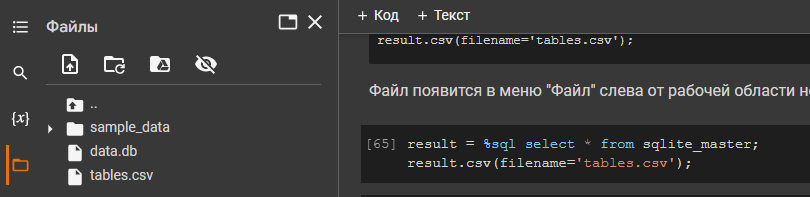

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


[('mngmnt', 'CREATE TABLE mngmnt (\n\torg_management_rk BIGINT, \n\tmanagement_nm TEXT\n)'),
 ('product', 'CREATE TABLE product (\n\thit_rk BIGINT, \n\thid BIGINT, \n\tusing_flg FLOAT\n)'),
 ('queue', 'CREATE TABLE queue (\n\tqueue_id BIGINT, \n\tqueue_desc TEXT\n)'),
 ('result', 'CREATE TABLE result (\n\thit_status_result_id BIGINT, \n\thit_status_result_desc TEXT\n)'),
 ('horoscope', 'CREATE TABLE horoscope (\n\tagent_login TEXT, \n\thoroscope TEXT\n)'),
 ('group', 'CREATE TABLE "group" (\n\torg_group_rk BIGINT, \n\torg_management_rk BIGINT, \n\tgroup_nm TEXT\n)'),
 ('emp_x_org_gr', 'CREATE TABLE emp_x_org_gr (\n\temployee_rk BIGINT, \n\torg_group_rk BIGINT\n)'),
 ('task', 'CREATE TABLE task (\n\ttask_rk BIGINT, \n\ttask_stage_id FLOAT, \n\tsource_system_cd TEXT, \n\tcreate_dttm TEXT, \n\tfinish_dttm TEXT\n)'),
 ('action', 'CREATE TABLE action (\n\thit_rk BIGINT, \n\thit_status_result_id BIGINT\n)'),
 ('call', 'CREATE TABLE call (\n\two_hit_rk BIGINT, \n\two_task_rk BIGINT, \n\two_queue_id BIGINT, \n\tagent_login TEXT, \n\two_employee_rk BIGINT, \n\tfinish_dttm TEXT, \n\tduratoin_sec TEXT\n)')]

# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


 функцию для выполнения SQL-запросов и возврата результатов в виде DataFrame

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect('/content/data.db')

def select(sql):
    return pd.read_sql(sql, con)


## Решение

Функция для определения внешних ключей

In [ ]:
sql = """
SELECT 
    m.name AS 'Table',
    p."from" AS 'Column',
    f.name AS 'Foreign Table',
    p."to" AS 'Foreign Column'
FROM 
    sqlite_master AS m
JOIN 
    pragma_foreign_key_list(m.name) AS p
ON 
    p.id = m.rowid
JOIN 
    sqlite_master AS f
ON 
    f.name = p."table"
"""

In [ ]:
result = select(sql)
print(result)

Empty DataFrame
Columns: [Table, Column, Foreign Table, Foreign Column]
Index: []


Внешних ключи отсутствуют, желательно запросить схему, но попробуем построить сами

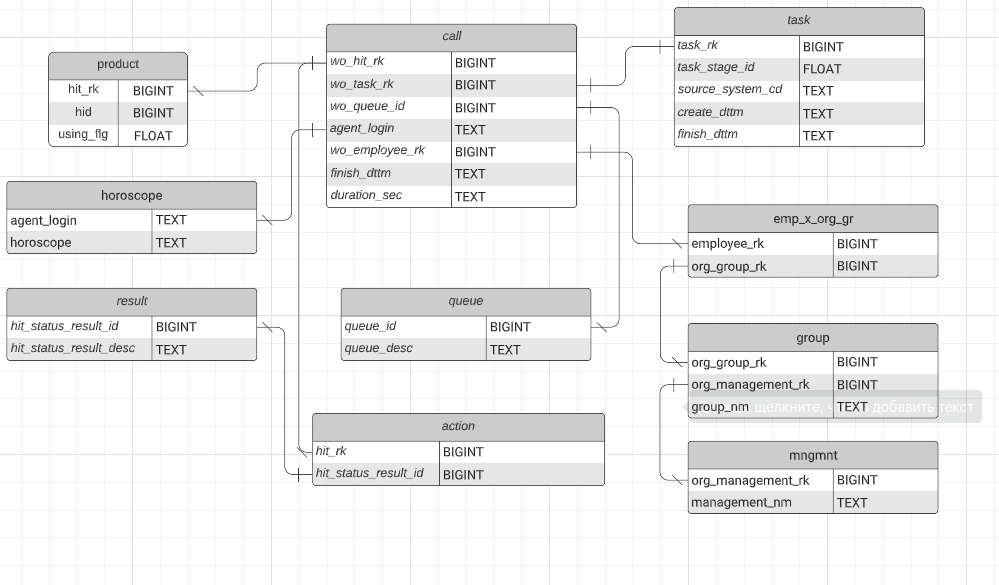

In [ ]:
general = '''
select * 
from call
left join product on product.hit_rk = call.wo_hit_rk
left join horoscope on horoscope.agent_login = call.agent_login
left join action on action.hit_rk = call.wo_hit_rk
left join result on result.hit_status_result_id = action.hit_status_result_id
left join queue on queue.queue_id = call.wo_queue_id
left join task on task.task_rk = call.wo_task_rk
left join emp_x_org_gr on emp_x_org_gr.employee_rk = call.wo_employee_rk
left join "group" on "group".org_group_rk = emp_x_org_gr.org_group_rk
left join mngmnt on mngmnt.org_management_rk = "group".org_management_rk
'''

In [ ]:
general = select(general)

In [ ]:
general

wo_hit_rk  wo_task_rk  wo_queue_id agent_login  wo_employee_rk  \
0       73292106    93625442        12245    lyangama        66749466   
1       93763347    98572816        11696    enkoiion        88931008   
2       13988704    91292760        14354    kinalapo        61041016   
3       28495290    12470192        14303    kinasgsa        98181009   
4       31412029      161228         9264    ikovnisu        47451124   
...          ...         ...          ...         ...             ...   
89169   33324411     9669248        13261    0514adan        54151125   
89170   47433834    17630259        10405    0553nman        71189971   
89171   74926225    94210856         9437    chicvvpo        98401109   
89172    1827701    90840698        14354    0422aeka        41149141   
89173   43261329    16057878         8156    eevamvxa         8831030   

               finish_dttm duratoin_sec    hit_rk  hid  using_flg  ...  \
0      2022-08-01 12:52:25            0  73292106    4        NaN  ...   
1      2022-08-08 10:46:46        12,53  93763347    3        NaN  ...   
2      2022-08-16 14:16:03            0  13988704    4        NaN  ...   
3      2022-08-22 18:38:13            0  28495290    4        NaN  ...   
4      2022-08-23 10:38:24       128,47  31412029    2        NaN  ...   
...                    ...          ...       ...  ...        ...  ...   
89169  2022-08-23 12:00:38       154,16  33324411    4        NaN  ...   
89170  2022-08-29 14:49:23            0  47433834    3        NaN  ...   
89171  2022-08-02 18:42:23            0  74926225    2        NaN  ...   
89172  2022-08-11 10:36:20            0   1827701    4        NaN  ...   
89173  2022-08-26 16:14:43       154,64  43261329    2        NaN  ...   

      source_system_cd          create_dttm          finish_dttm  employee_rk  \
0                   GI  2022-08-01 00:46:37  2022-08-01 15:35:39     66749466   
1                   GI  2022-08-06 11:24:23  2022-08-17 11:23:53     88931008   
2                   GI  2022-07-29 04:46:37  2022-09-22 10:57:30     61041016   
3                   GI  2022-08-21 01:55:57  2022-08-30 12:59:05     98181009   
4                   GI  2022-08-08 01:01:35  2022-08-23 10:38:33     47451124   
...                ...                  ...                  ...          ...   
89169               FW  2022-08-19 20:18:07  2022-08-23 12:00:38     54151125   
89170               GI  2022-08-28 12:43:24  2022-08-30 18:09:17     71189971   
89171               GI  2022-08-02 15:41:58  2022-08-08 09:14:57     98401109   
89172               GI  2022-07-28 04:48:03  2022-09-15 13:53:03     41149141   
89173               CM  2022-08-26 14:07:32  2022-09-06 06:34:23      8831030   

      org_group_rk org_group_rk  org_management_rk   group_nm  \
0             3244         3244               1621  Группа 30   
1             2568         2568               1728  Группа 20   
2             2389         2389                323   Группа 5   
3             2097         2097                687  Группа 19   
4             2105         2105                689  Группа 31   
...            ...          ...                ...        ...   
89169          771          771                439  Группа 43   
89170         3240         3240               1621  Группа 36   
89171         2517         2517               1718  Группа 25   
89172         2389         2389                323   Группа 5   
89173          252          252                401  Группа 13   

       org_management_rk          management_nm  
0                   1621    Управление КЦ Чизан  
1                   1728      Управление КЦ Мас  
2                    323  Управление КЦ Ромашка  
3                    687     Управление КЦ Верс  
4                    689    Управление КЦ Казан  
...                  ...                    ...  
89169                439     Управление КЦ Мерс  
89170               1621    Управление КЦ Чизан  
89171               1718      Управле

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
general.to_csv('/content/general.csv', index=False)


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [ ]:
sql = """
SELECT *
FROM result
WHERE hit_status_result_desc IN ('Дозвон, Успешно', 'Дозвон, Отказ')
"""


In [ ]:
select(sql)

hit_status_result_id hit_status_result_desc
0                     1          Дозвон, Отказ
1                     3        Дозвон, Успешно

In [ ]:
SUCCESS_STATUS_ID = 3  
REJECT_STATUS_ID = 1  

# Общее количество звонков со статусом «Дозвон, Успешно»
sql1 = f"""
SELECT COUNT(*) as total_successful_calls
FROM call
JOIN action ON action.hit_rk = call.wo_hit_rk
WHERE action.hit_status_result_id = {SUCCESS_STATUS_ID}
"""

In [ ]:
total_successful_calls = select(sql1).iloc[0]['total_successful_calls']
total_successful_calls

3310

In [ ]:
# Конверсия
sql2 = f"""
SELECT COUNT(*) as total_calls
FROM call
JOIN action ON action.hit_rk = call.wo_hit_rk
WHERE action.hit_status_result_id IN ({SUCCESS_STATUS_ID}, {REJECT_STATUS_ID})
"""

total_calls = select(sql2).iloc[0]['total_calls']
conversion_rate = total_successful_calls / total_calls


In [ ]:
# Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»
sql3 = f"""
SELECT AVG(CAST(duratoin_sec AS INTEGER)) as avg_duration
FROM call
JOIN action ON action.hit_rk = call.wo_hit_rk
WHERE action.hit_status_result_id = {SUCCESS_STATUS_ID}
"""

avg_duration = select(sql3).iloc[0]['avg_duration']

print("Общее количество звонков со статусом «Дозвон, Успешно»:", total_successful_calls)
print("Продажная конверсия:", conversion_rate)
print("Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»:", avg_duration)


Общее количество звонков со статусом «Дозвон, Успешно»: 3310
Продажная конверсия: 0.15205108181358812
Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»: 109.68700906344411


 Количество звонков по каждому оператору


In [ ]:
sql = '''SELECT agent_login, COUNT(*) as calls_count
FROM call
GROUP BY agent_login
ORDER BY calls_count DESC
'''

In [ ]:
select(sql)

agent_login  calls_count
0       covaadru          184
1       enkovaab          159
2       levaadko          156
3       kinalapo          152
4       8857iaro          151
...          ...          ...
1957    3645tsle            1
1958    2984aoku            1
1959    2949gada            1
1960    2826sade            1
1961    1058asto            1

[1962 rows x 2 columns]

# Задание 3


Проанализировать базу данных: найти тренды, зоны роста, аномалии и так далее. Все выводы предоставить в виде dashboard-ов в Excel. Предварительно, после скачивании данных с https://colab.research.google.com/ в CSV, фаил необходимо отформатировать (разделить по столбцам значения) и только потом приступить к созданию dashboard-ов. Ответом на задачу должен быть excel фаил с dashboard-ами и своими выводами. Если не получится разделить столбцы, можно воспользоваться фаилом "Витрины"

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
general = pd.read_csv('/content/general.csv')

In [ ]:
general 
print("Количество строк до удаления дубликатов:", len(general))
general = general.drop_duplicates()
print("Количество строк после удаления дубликатов:", len(general))

Количество строк до удаления дубликатов: 89174
Количество строк после удаления дубликатов: 89174


In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89174 entries, 0 to 89173
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wo_hit_rk               89174 non-null  int64  
 1   wo_task_rk              89174 non-null  int64  
 2   wo_queue_id             89174 non-null  int64  
 3   agent_login             89174 non-null  object 
 4   wo_employee_rk          89174 non-null  int64  
 5   finish_dttm             89174 non-null  object 
 6   duratoin_sec            89174 non-null  object 
 7   hit_rk                  89174 non-null  int64  
 8   hid                     89174 non-null  int64  
 9   using_flg               2525 non-null   float64
 10  agent_login.1           89174 non-null  object 
 11  horoscope               89174 non-null  object 
 12  hit_rk.1                89174 non-null  int64  
 13  hit_status_result_id    89174 non-null  int64  
 14  hit_status_result_id.1  89174 non-null

In [ ]:
general.drop(columns=general.columns[[0,1, 2, 4, 10, 12, 14, 22, 25, 28]], axis=1, inplace=True) #удалим повторяющиеся колонки

## Проверим второе задание в pandas

In [ ]:
general.groupby('hit_status_result_desc')['hit_status_result_desc'].count()

hit_status_result_desc
Дозвон, Некорректное задание по звонку       26
Дозвон, Отказ                             18459
Дозвон, Отложить                           1680
Дозвон, Перезвонить                       15108
Дозвон, Успешно                            3310
Не было звонка                              130
Недозвон                                  50461
Name: hit_status_result_desc, dtype: int64

In [ ]:
general.groupby('hit_status_result_id')['hit_status_result_desc'].count()

hit_status_result_id
1    18459
2    15108
3     3310
4      130
5    50461
6     1680
8       26
Name: hit_status_result_desc, dtype: int64

In [ ]:
total_successful_calls = sum(general['hit_status_result_desc'] == 'Дозвон, Успешно')
total_calls = sum(general['hit_status_result_desc'] == 'Дозвон, Успешно') + sum(general['hit_status_result_desc'] == 'Дозвон, Отказ')
conversion_rate = total_successful_calls/total_calls
general['duratoin_sec'] = general['duratoin_sec'].str.replace(',', '.').astype(float)

avg_duration = general.query("hit_status_result_desc == 'Дозвон, Успешно'")['duratoin_sec'].mean()


print("Общее количество звонков со статусом «Дозвон, Успешно»:", total_successful_calls)
print("Продажная конверсия:", conversion_rate)
print("Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»:", avg_duration)


Общее количество звонков со статусом «Дозвон, Успешно»: 3310
Продажная конверсия: 0.15205108181358812
Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»: 110.17535347432026


## Подготовка данных, поиск анамалий, анализ 

In [ ]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89174 entries, 0 to 89173
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   agent_login             89174 non-null  object 
 1   finish_dttm             89174 non-null  object 
 2   duratoin_sec            89174 non-null  float64
 3   hit_rk                  89174 non-null  int64  
 4   hid                     89174 non-null  int64  
 5   using_flg               2525 non-null   float64
 6   horoscope               89174 non-null  object 
 7   hit_status_result_id    89174 non-null  int64  
 8   hit_status_result_desc  89174 non-null  object 
 9   queue_id                89172 non-null  float64
 10  queue_desc              89172 non-null  object 
 11  task_rk                 89174 non-null  int64  
 12  task_stage_id           85383 non-null  float64
 13  source_system_cd        89174 non-null  object 
 14  create_dttm             89174 non-null

 0   agent_login              Логин оператора   
 1   finish_dttm              Дата-время завершения коммуникации   
 2   duratoin_sec             Длительность коммуникации в секундах   
 3   hit_rk                   Ключ коммуникации с клиентом   
 4   hid                      Идентификатор продукта  
 5   using_flg                Флаг начала пользования продуктом   
 6   horoscope                Гороскоп   
 7   hit_status_result_id     Идентификтор результата коммуникации   
 8   hit_status_result_desc   Расшифровка идентификтора результата коммуникации   
 9   queue_id                 Идентификтор очереди, на которой получено задание   
 10  queue_desc               Расшифровка Идентификтора очереди, на которой получено задание   
 11  task_rk                  Ключ задания   
 12  task_stage_id            Идентификтор стадии задания   
 13  source_system_cd         Код системы источника   
 14  create_dttm              Дата-время создания задания   
 15  employee_rk              Ключ оператора    
 16  org_group_rk             Ключ группы, в которой работает оператор   
 17  org_management_rk        Ключ управления, в которой работает оператор   
 18  group_nm                 Расшифровка ключа группы, в которой работает оператор   
 19  management_nm            Расшифровка ключа управления, в которой работает оператор   

In [ ]:
general.isna().sum()# определил стобцы с пропусками


agent_login                   0
finish_dttm                   0
duratoin_sec                  0
hit_rk                        0
hid                           0
using_flg                 86649
horoscope                     0
hit_status_result_id          0
hit_status_result_desc        0
queue_id                      2
queue_desc                    2
task_rk                       0
task_stage_id              3791
source_system_cd              0
create_dttm                   0
employee_rk                   0
org_group_rk                  0
org_management_rk             0
group_nm                      0
management_nm                 0
dtype: int64

In [ ]:
general['finish_dttm'] = pd.to_datetime(general['finish_dttm'])# приведем столбец к формату datatime
general['create_dttm'] = pd.to_datetime(general['create_dttm'])# приведем столбец к формату datatime
general['using_flg'].fillna(-1, inplace=True) # Nan заменим на "-1" те значение где не согласились, но не отказались
general['using_flg'] = general['using_flg'].astype(int)
general['queue_id'].fillna(-1, inplace=True) # Nan заменим на "-1"
general['queue_id'] = general['queue_id'].astype(int)

In [ ]:
general[general['queue_id'] == -1]

agent_login         finish_dttm  duratoin_sec    hit_rk  hid  using_flg  \
6862     6817avsh 2022-08-25 14:16:32         41.48  40172071    1         -1   
25381    hinasigr 2022-08-04 15:20:25         95.53  84433959    4         -1   

      horoscope  hit_status_result_id hit_status_result_desc  queue_id  \
6862   Скорпион                     2    Дозвон, Перезвонить        -1   
25381       Рак                     1          Дозвон, Отказ        -1   

      queue_desc   task_rk  task_stage_id source_system_cd  \
6862         NaN  10090504            1.0               GI   
25381        NaN  96043819           23.0               FW   

              create_dttm  employee_rk  org_group_rk  org_management_rk  \
6862  2022-08-19 22:01:26     68361116          2138               1521   
25381 2022-08-04 05:52:43     91059791          2097                687   

        group_nm        management_nm  
6862   Группа 29  Управление КЦ Дирим  
25381  Группа 19   Управление КЦ Верс

<ipython-input-33-f9e93ead2ba3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(general.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');


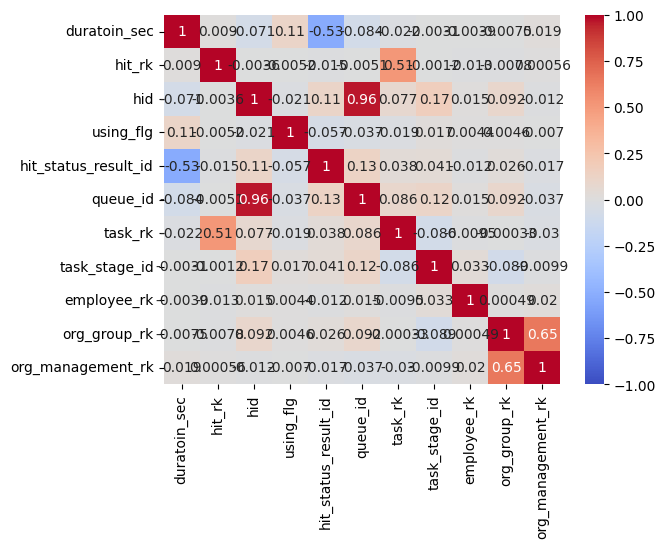

In [ ]:
sns.heatmap(general.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');


1. Наблюдаеться корреляция между 'hit_status_result_id' результата коммуникации  'duratoin_sec' Длительность коммуникации в секундах   
2. 'queue_id' Идентификтор очереди, на которой получено задание и 'hid' Идентификатор продукта
3.  'hit_rk' Ключ коммуникации с клиентом и ключ задание 'task_rk'  
  
Из этих двух нас интересуют первые два.

In [ ]:
general['finish_date'] = general['finish_dttm'].dt.date

In [ ]:
#Рассчитайте Q1 (25-й процентиль), Q3 (75-й процентиль) и IQR:

Q1 = general['duratoin_sec'].quantile(0.25)
Q3 = general['duratoin_sec'].quantile(0.75)
IQR = Q3 - Q1
#Определите границы аномалий. Обычно аномалии определяют как значения за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Найдите аномалии:
anomalies = general[(general['duratoin_sec'] < lower_bound) | (general['duratoin_sec'] > upper_bound)]
anomalies.head()
anomalies.groupby('agent_login')['finish_dttm'].count()

agent_login
0212legr    32
Name: finish_dttm, dtype: int64

In [ ]:
general['duratoin_dttm'] = general['finish_dttm'] - general['create_dttm'] # время от начала задания до завершения

In [ ]:
#Рассчитайте Q1 (25-й процентиль), Q3 (75-й процентиль) и IQR:

Q1 = general['duratoin_dttm'].quantile(0.25)
Q3 = general['duratoin_dttm'].quantile(0.75)
IQR = Q3 - Q1
#Определите границы аномалий. Обычно аномалии определяют как значения за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Найдите аномалии:
anomalies = general[(general['duratoin_dttm'] < lower_bound) | (general['duratoin_dttm'] > upper_bound)]
anomalies.groupby('agent_login')['duratoin_dttm'].count().sort_values(ascending=False).head(10)


agent_login
covaadru    41
rovaeagu    31
movafaab    31
6406akko    31
enkovaab    31
6886aiaz    31
linavdgl    30
4552aabl    30
6951eako    29
9829daan    28
Name: duratoin_dttm, dtype: int64

<Axes: xlabel='source_system_cd'>

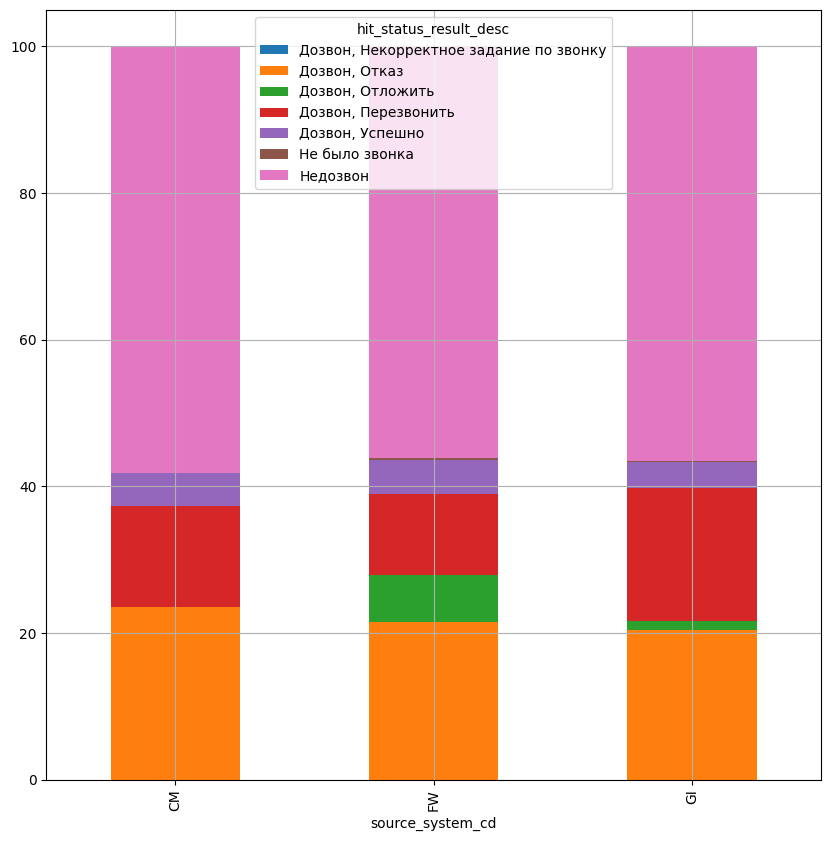

In [ ]:
grouped_data = general.groupby(['source_system_cd', 'hit_status_result_desc'])['using_flg'].count().reset_index()
grouped_data.rename(columns={'using_flg': 'call_count'}, inplace=True)

total_calls = grouped_data.groupby('source_system_cd')['call_count'].sum().reset_index()
total_calls.rename(columns={'call_count': 'total_calls'}, inplace=True)

normalized_data = grouped_data.merge(total_calls, on='source_system_cd')
normalized_data['percentage'] = (normalized_data['call_count'] / normalized_data['total_calls']) * 100

normalized_data.pivot_table(index='source_system_cd', columns='hit_status_result_desc', values='percentage').plot.bar(stacked=True, figsize=(10, 10), grid=True)


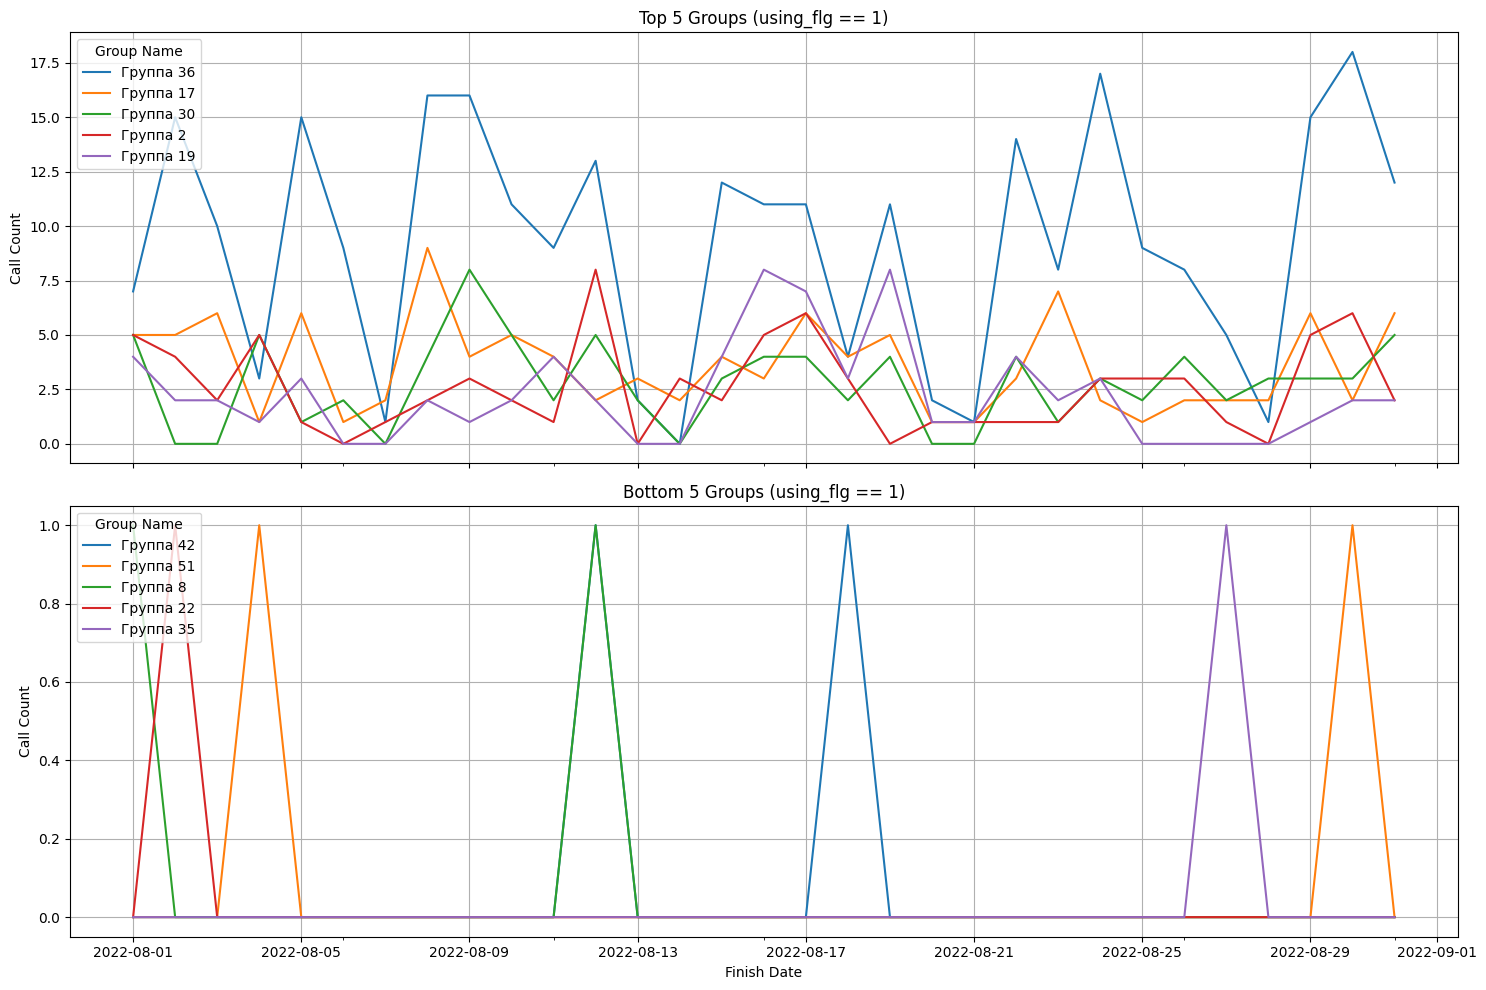

In [ ]:
calls_by_date_group_using = general[general['using_flg'] == 1].groupby(['finish_date', 'group_nm']).size().reset_index(name='call_count')
pivot_table_using = calls_by_date_group_using.pivot_table(index='finish_date', columns='group_nm', values='call_count', fill_value=0)
sorted_columns_using = pivot_table_using.mean().sort_values(ascending=False).index
pivot_table_using = pivot_table_using[sorted_columns_using]
top_5_groups_using = pivot_table_using.iloc[:, :5]
bottom_5_groups_using = pivot_table_using.iloc[:, -5:]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

top_5_groups_using.plot(ax=ax[0], grid=True)
ax[0].set_title('Top 5 Groups (using_flg == 1)')
ax[0].set_xlabel('Finish Date')
ax[0].set_ylabel('Call Count')
ax[0].legend(loc='upper left', title='Group Name')

bottom_5_groups_using.plot(ax=ax[1], grid=True)
ax[1].set_title('Bottom 5 Groups (using_flg == 1)')
ax[1].set_xlabel('Finish Date')
ax[1].set_ylabel('Call Count')
ax[1].legend(loc='upper left', title='Group Name')

plt.tight_layout()
plt.show()


Таким образом, на графике будут отображены пять лучших и худших групп на основе среднего значения для using_flg == 1.

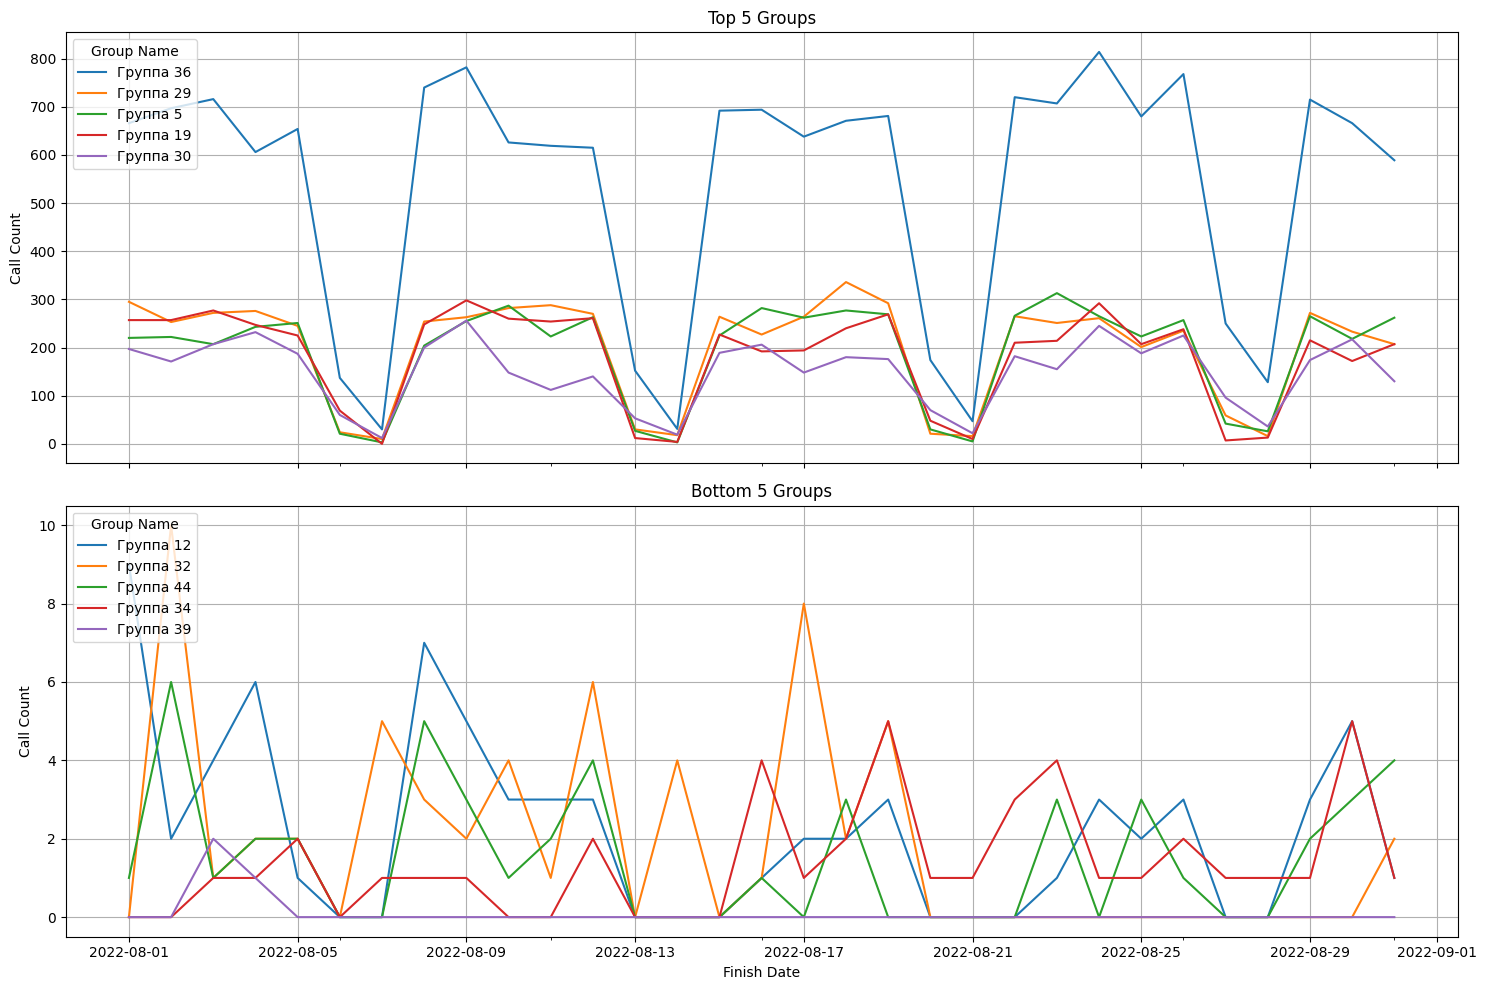

In [ ]:
calls_by_date_group = general.groupby(['finish_date', 'group_nm']).size().reset_index(name='call_count')

pivot_table = calls_by_date_group.pivot_table(index='finish_date', columns='group_nm', values='call_count', fill_value=0)
sorted_columns = pivot_table.mean().sort_values(ascending=False).index
pivot_table = pivot_table[sorted_columns]
top_5_groups = pivot_table.iloc[:, :5]
bottom_5_groups = pivot_table.iloc[:, -5:]

fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

top_5_groups.plot(ax=ax[0], grid=True)
ax[0].set_title('Top 5 Groups')
ax[0].set_xlabel('Finish Date')
ax[0].set_ylabel('Call Count')
ax[0].legend(loc='upper left', title='Group Name')

bottom_5_groups.plot(ax=ax[1], grid=True)
ax[1].set_title('Bottom 5 Groups')
ax[1].set_xlabel('Finish Date')
ax[1].set_ylabel('Call Count')
ax[1].legend(loc='upper left', title='Group Name')

plt.tight_layout()
plt.show()


Таким образом, на графике будут отображены пять лучших и худших групп на основе среднего значения количества звонков.

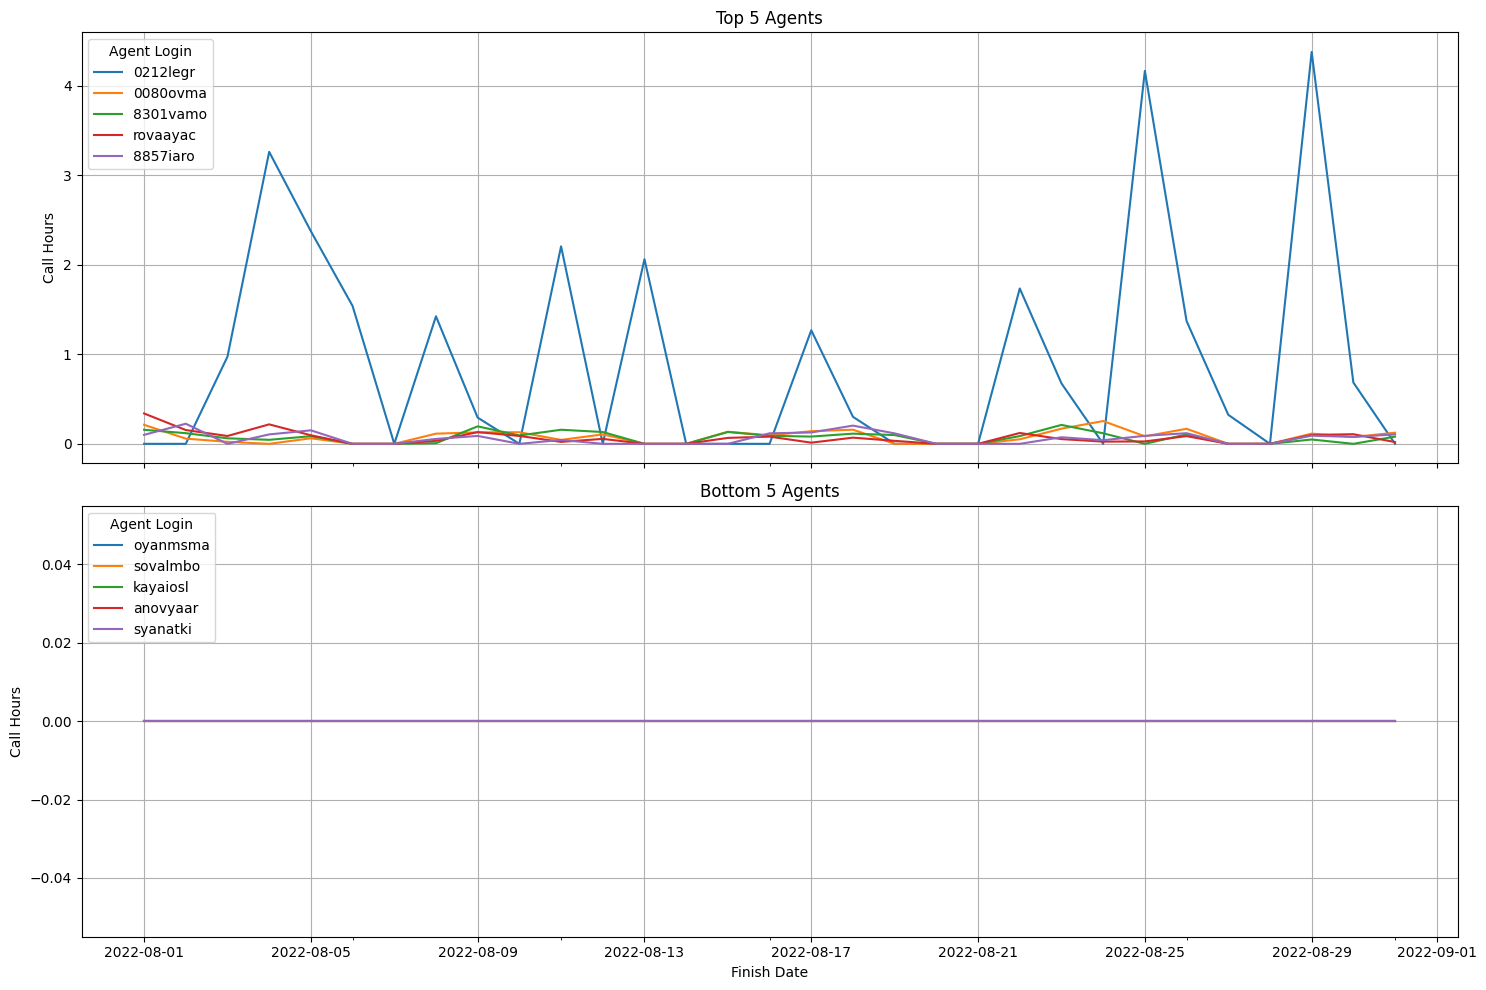

In [ ]:
general['duration_hours'] = general['duratoin_sec']/ 3600
hours_by_date_agent = general.groupby(['finish_date', 'agent_login'])['duration_hours'].sum().reset_index()
pivot_table_hours = hours_by_date_agent.pivot_table(index='finish_date', columns='agent_login', values='duration_hours', fill_value=0)
sorted_columns_hours = pivot_table_hours.mean().sort_values(ascending=False).index
pivot_table_hours = pivot_table_hours[sorted_columns_hours]
top_5_agents = pivot_table_hours.iloc[:, :5]
bottom_5_agents = pivot_table_hours.iloc[:, -5:]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

top_5_agents.plot(ax=ax[0], grid=True)
ax[0].set_title('Top 5 Agents')
ax[0].set_xlabel('Finish Date')
ax[0].set_ylabel('Call Hours')
ax[0].legend(loc='upper left', title='Agent Login')

bottom_5_agents.plot(ax=ax[1], grid=True)
ax[1].set_title('Bottom 5 Agents')
ax[1].set_xlabel('Finish Date')
ax[1].set_ylabel('Call Hours')
ax[1].legend(loc='upper left', title='Agent Login')

plt.tight_layout()
plt.show()


In [ ]:
bottom_43_agents = pivot_table_hours.iloc[:, -43:]
bottom_43_agents.head()

agent_login  dyanmmkr  1963datr  zyannosh  1058asto  chukkima  yrovibna  \
finish_date                                                               
2022-08-01          0         0         0         0         0         0   
2022-08-02          0         0         0         0         0         0   
2022-08-03          0         0         0         0         0         0   
2022-08-04          0         0         0         0         0         0   
2022-08-05          0         0         0         0         0         0   

agent_login  1052aagr  1494aexa  nyanlama  novagmam  ...  gyangxav  aevatash  \
finish_date                                          ...                       
2022-08-01          0         0         0         0  ...         0         0   
2022-08-02          0         0         0         0  ...         0         0   
2022-08-03          0         0         0         0  ...         0         0   
2022-08-04          0         0         0         0  ...         0         0   
2022-08-05          0         0         0         0  ...         0         0   

agent_login  3764yuam  ajloagxo  hevanaxo  oyanmsma  sovalmbo  kayaiosl  \
finish_date                                                               
2022-08-01          0         0         0         0         0         0   
2022-08-02          0         0         0         0         0         0   
2022-08-03          0         0         0         0         0         0   
2022-08-04          0         0         0         0         0         0   
2022-08-05          0         0         0         0         0         0   

agent_login  anovyaar  syanatki  
finish_date                      
2022-08-01          0         0  
2022-08-02          0         0  
2022-08-03          0         0  
2022-08-04          0         0  
2022-08-05          0         0  

[5 rows x 43 columns]

Таким образом, 43 оператора не сделали ни одного часа звонков за август

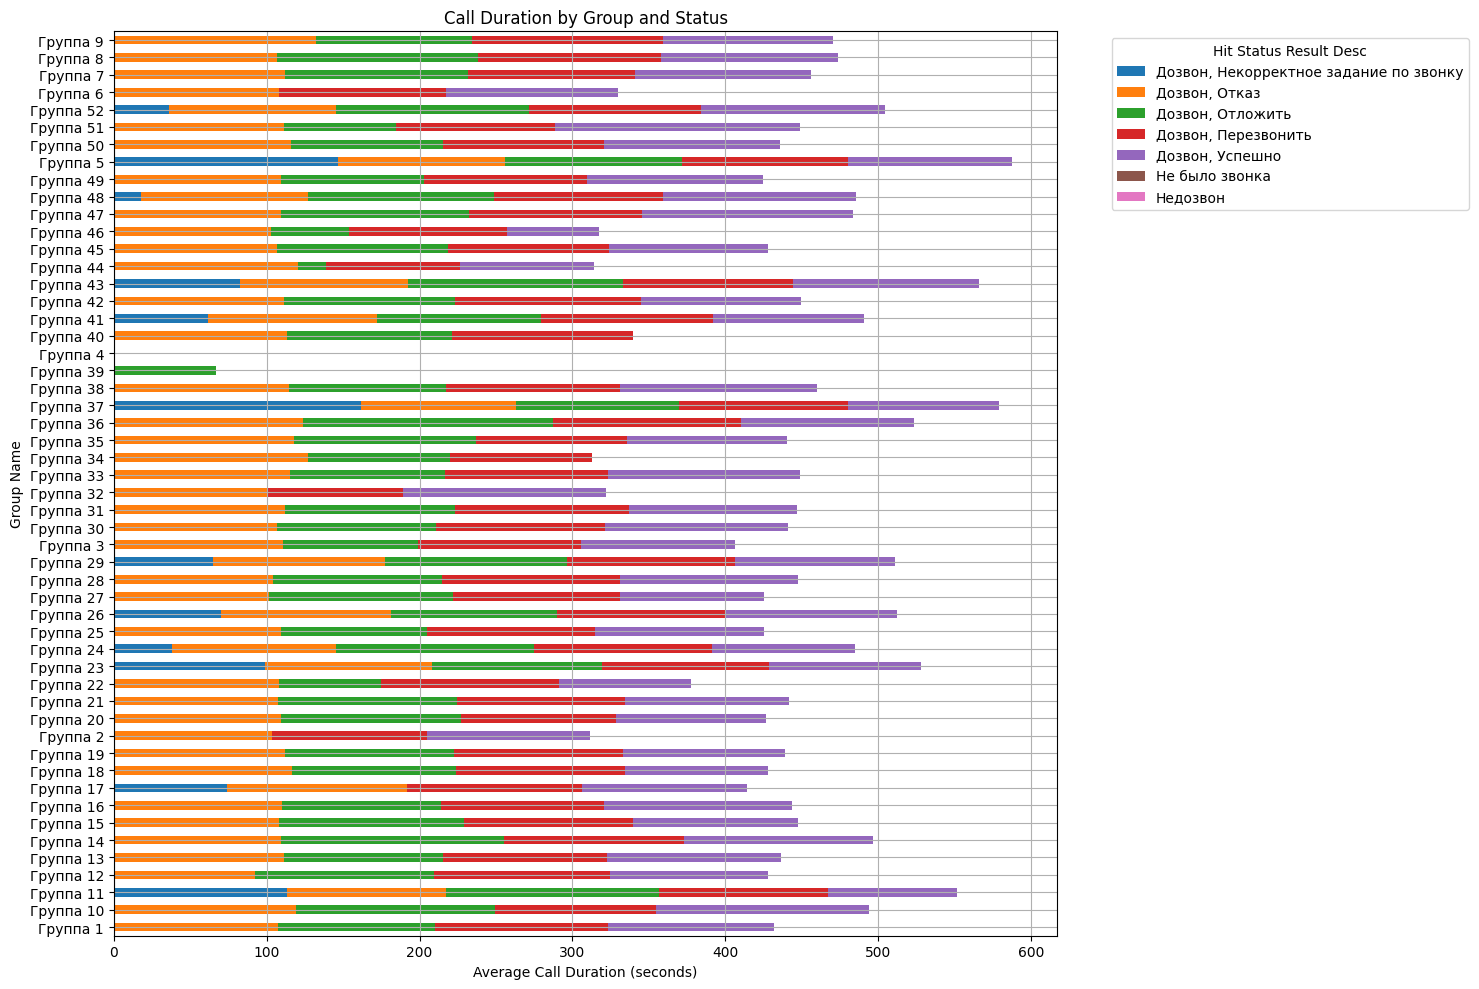

In [ ]:
group_status_duration = general.groupby(['group_nm', 'hit_status_result_desc'])['duratoin_sec'].mean().reset_index()
pivot_table_group_status = group_status_duration.pivot_table(index='group_nm', columns='hit_status_result_desc', values='duratoin_sec', fill_value=0)
ax = pivot_table_group_status.plot.barh(stacked=True, figsize=(15, 10), grid=True)
ax.set_xlabel('Average Call Duration (seconds)')
ax.set_ylabel('Group Name')
ax.set_title('Call Duration by Group and Status')
ax.legend(title='Hit Status Result Desc', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Для анализа зависимости продолжительности звонка разных групп от hit_status_result_desc, сгруппировали данные по group_nm и hit_status_result_desc, а затем вычислили среднюю продолжительность звонка для каждой группы и статуса.    




<ipython-input-44-dfcf5d4f99b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operator_data['finish_dttm'] = pd.to_datetime(operator_data['finish_dttm']).dt.date


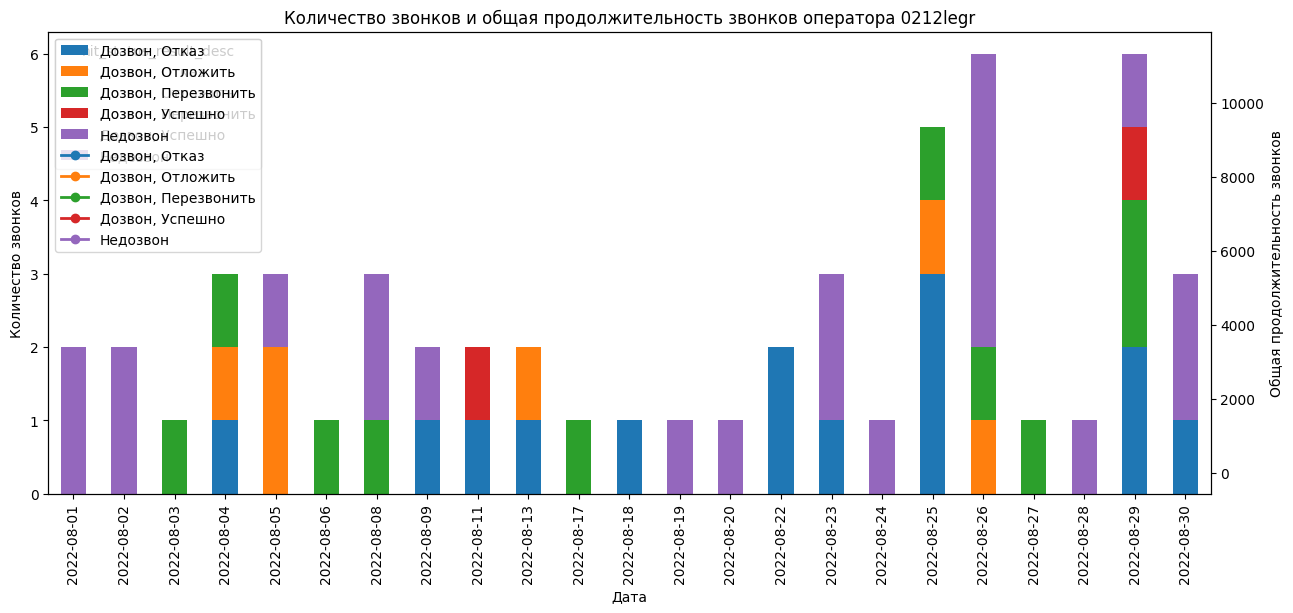

In [ ]:
operator_data = general[general['agent_login'] == '0212legr']

operator_data['finish_dttm'] = pd.to_datetime(operator_data['finish_dttm']).dt.date

grouped_data = operator_data.groupby(['finish_dttm', 'hit_status_result_desc']).agg({'duratoin_sec': 'sum', 'hit_rk': 'count'}).reset_index()

pivot_data = grouped_data.pivot_table(index='finish_dttm', columns='hit_status_result_desc', values=['hit_rk', 'duratoin_sec'])

fig, ax1 = plt.subplots(figsize=(15, 6))

pivot_data['hit_rk'].plot.bar(stacked=True, ax=ax1)
ax1.set_ylabel('Количество звонков')
ax1.set_xlabel('Дата')

ax2 = ax1.twinx()
pivot_data['duratoin_sec'].plot(ax=ax2, lw=2, legend=False, marker='o')
ax2.set_ylabel('Общая продолжительность звонков')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Количество звонков и общая продолжительность звонков оператора 0212legr')
plt.show()


### Вывод

1. Сделали предобработку данных виявили две аномалии в колонке 'queue_id'. Отсутствует запись об идентификторе очереди, на которую получено задание.
Вместо Nan в колонках 'using_flg' и 'queue_id' заменили -1 - неизвестно.   
2. Выявили аномалии оператора '0212legr' в продолжительности звонков
3. Анамально долго выполняют задания 'covaadru', 'rovaeagu', 'movafaab', '6406akko', 'enkovaab', '6886aiaz'.
4. От источника GI больще всего звонков.
5. Выявили пять лучших групп по количеству звонков(5, 19, 36, 29, 30), привлеченных пользователей(12, 32, 34, 39, 44) и пять худших групп по количеству звонков (12, 32, 34, 39, 44) и по привлеченным клиентам(8, 42, 22, 35, 51). 
6. 43 оператора не сделали ни одного звонка за август, возможно кто-то был в отпуске. 0212legr провел больше всех звонков, но у него есть анамалии
7. Группа 4, 39, 2 меньше всего продолжительность звонков отсутствуют успешные.
Группы 5, 37, 23, 11 больше всего Некорректных заданий по звонку.
Группа 40, 34 нет успешно выполненых звонков.
8. Потвердили что чем дольше звонок тем больше успешных заданий
9. У 0212legr не больше 6 звонков в день с очень большой продолжительностью - это анамально.

##тренды, зоны роста, аномалии и так далее.


<ipython-input-45-09ec369030f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_trends['finish_dttm'] = pd.to_datetime(data_for_trends['finish_dttm']).dt.date


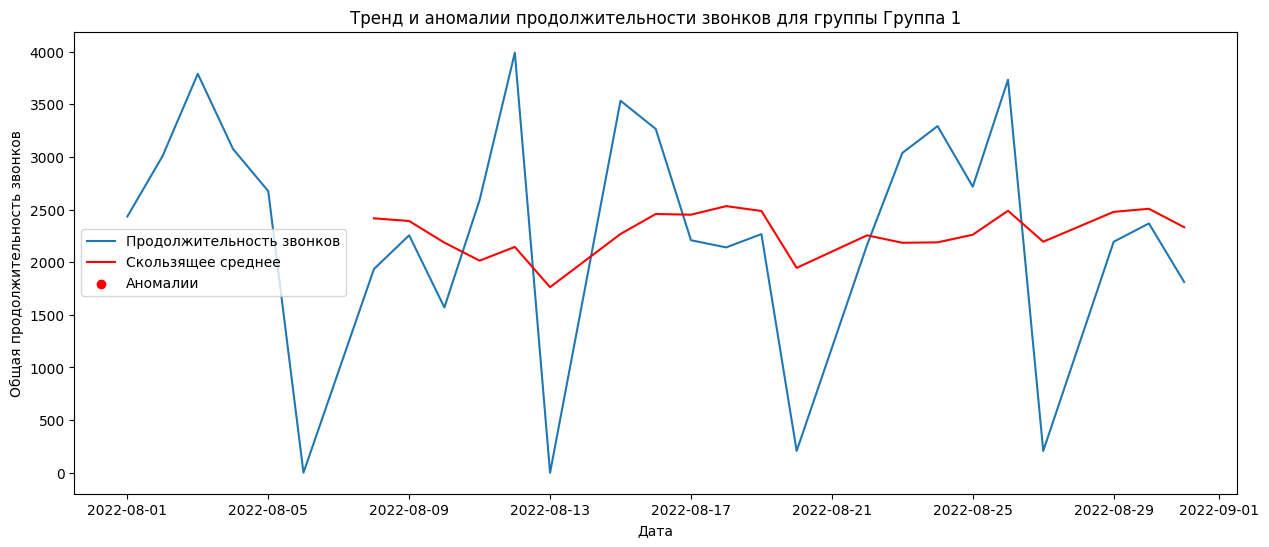

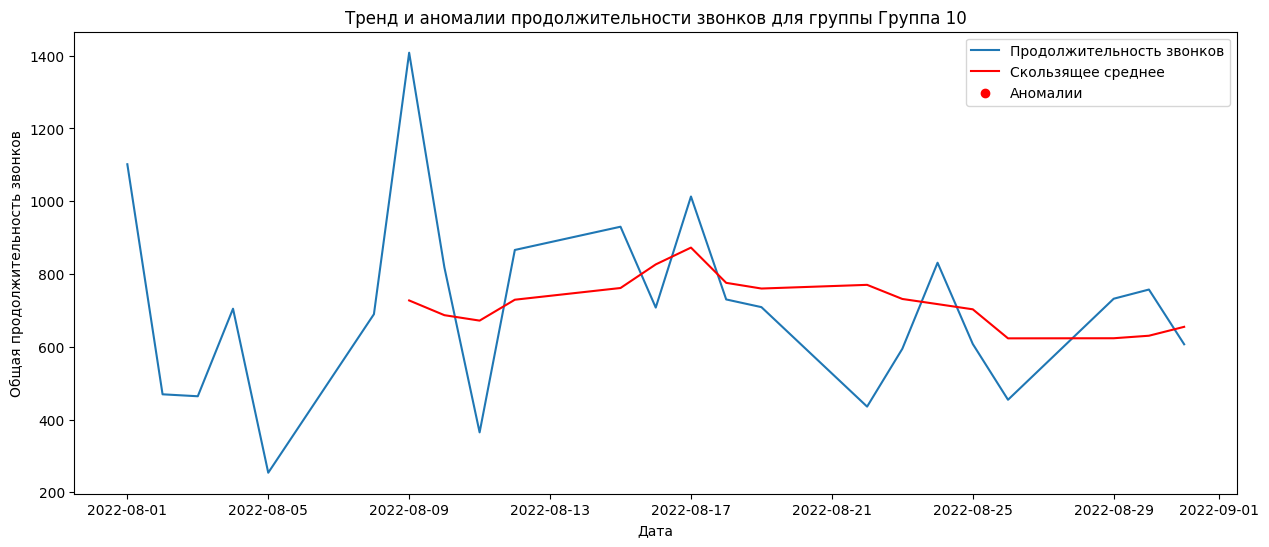

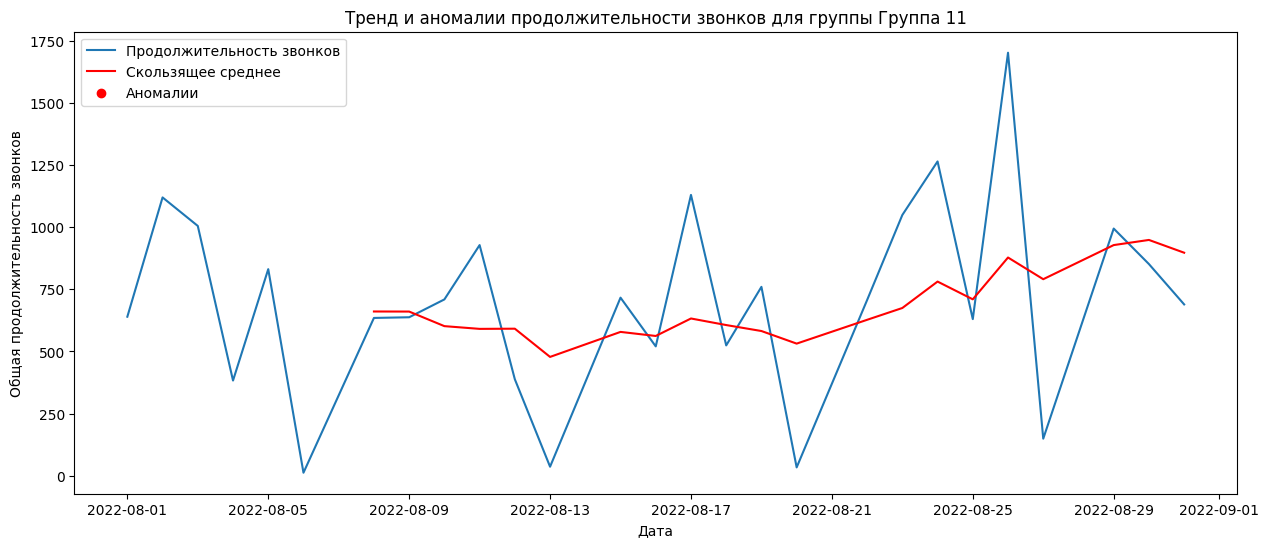

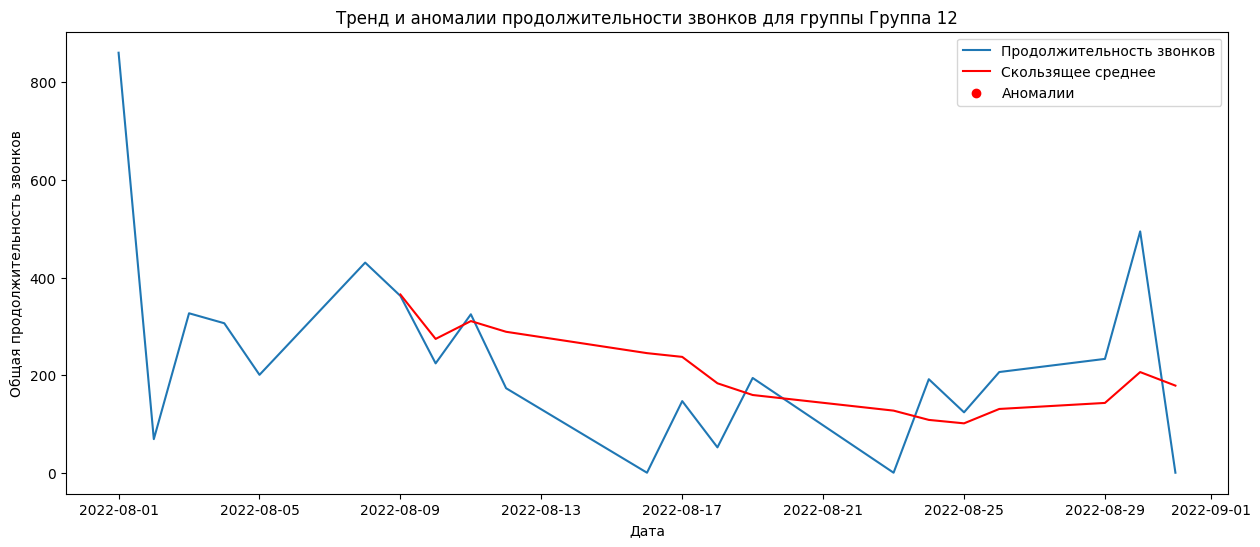

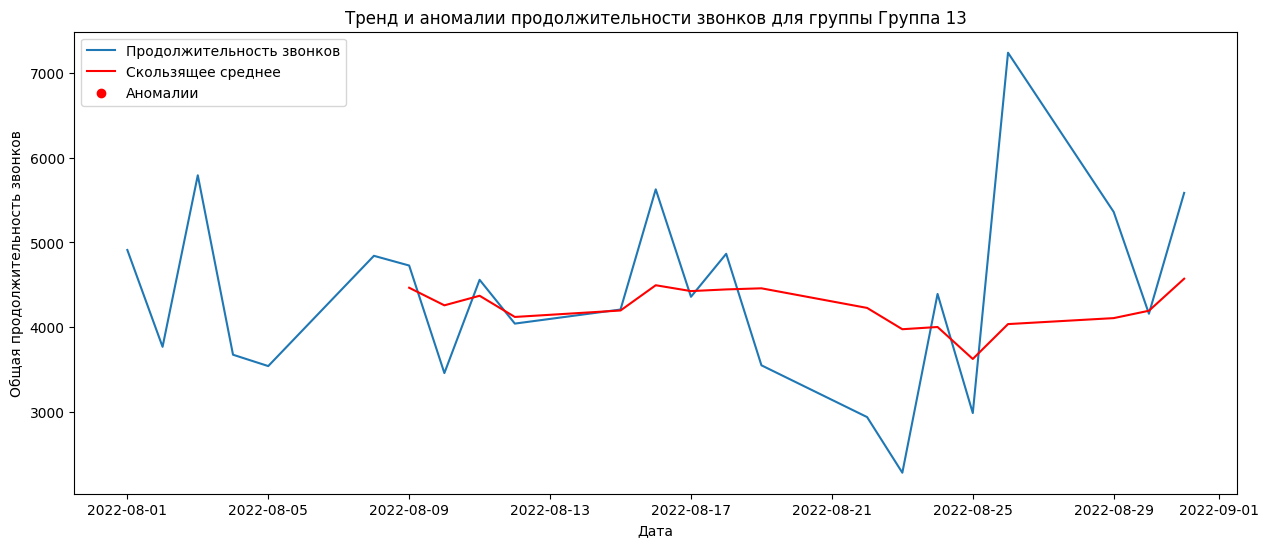

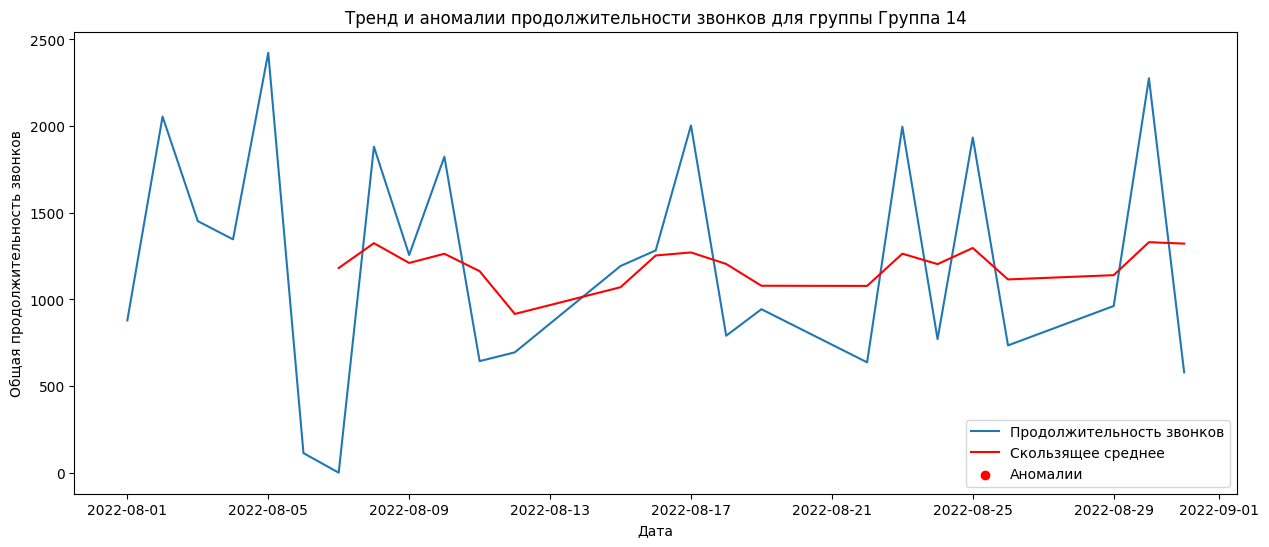

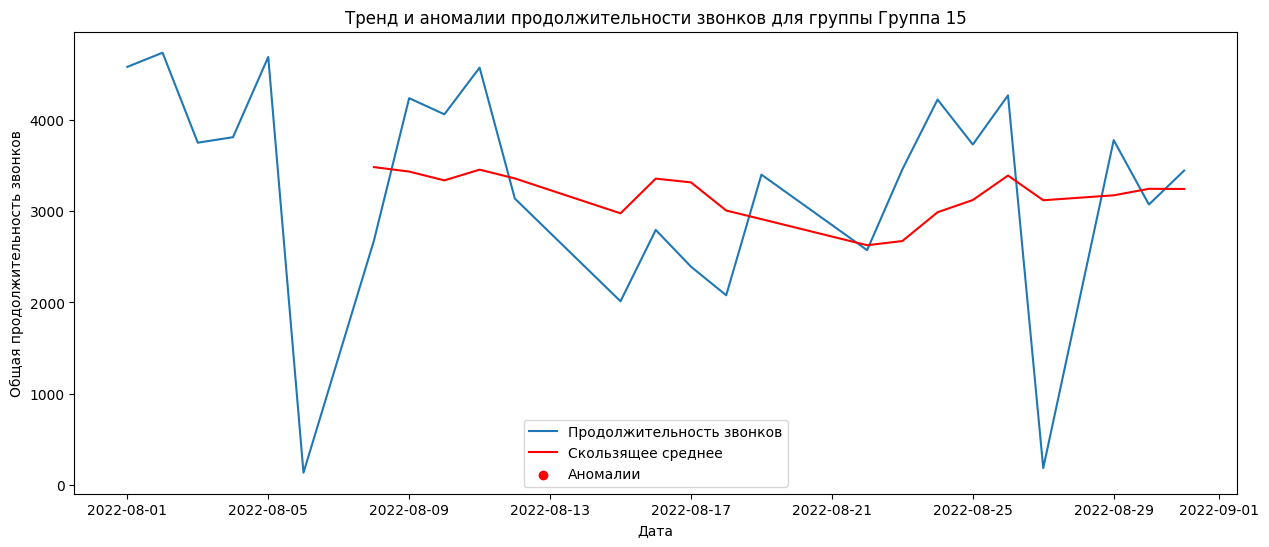

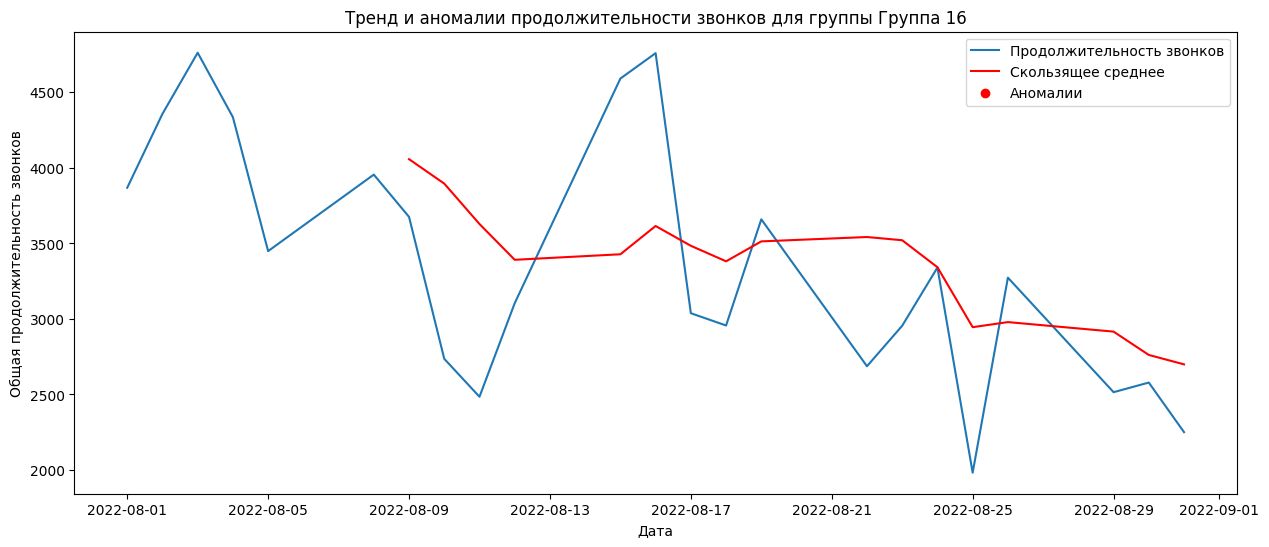

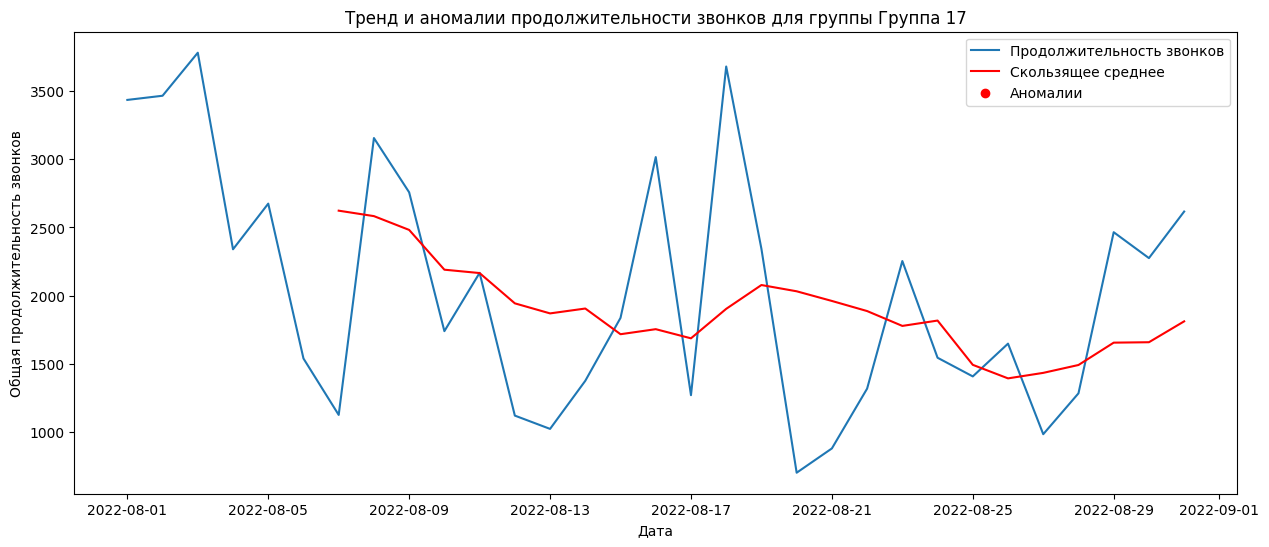

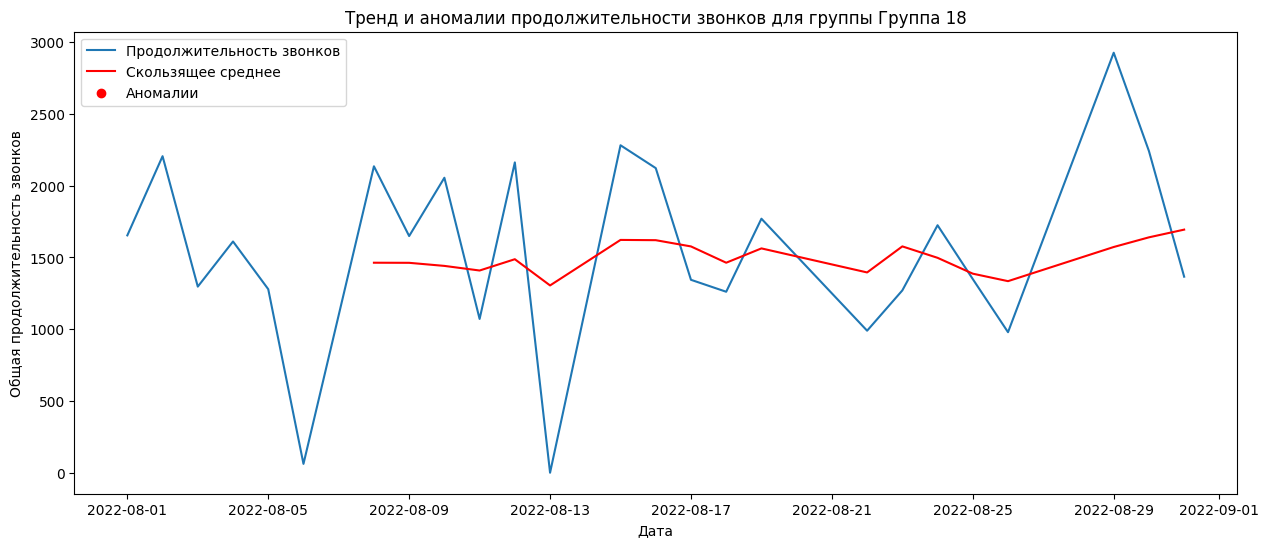

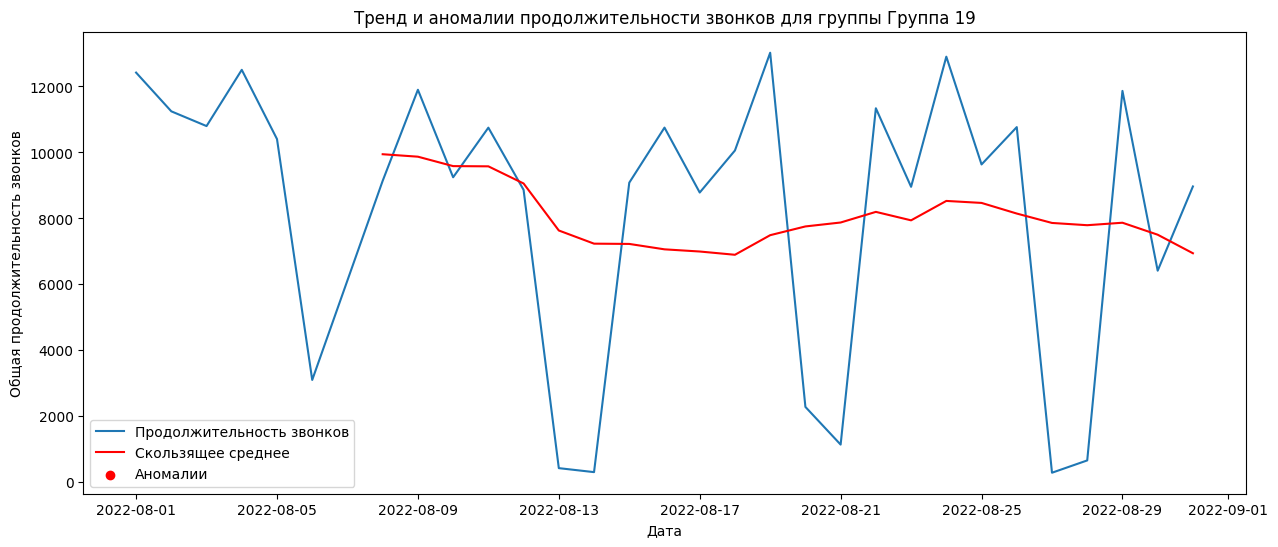

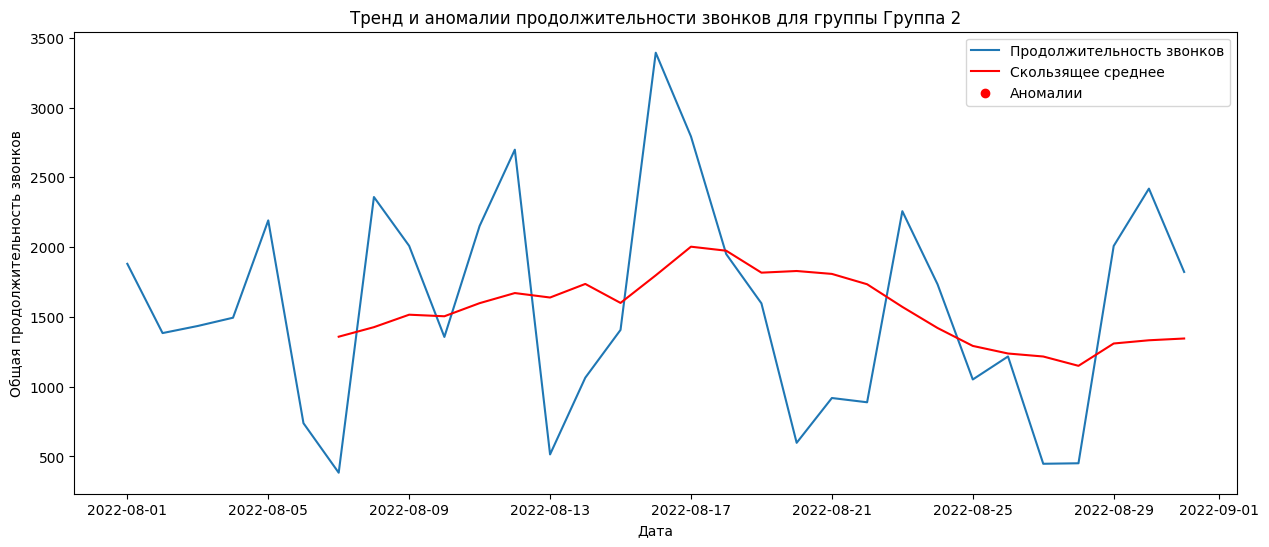

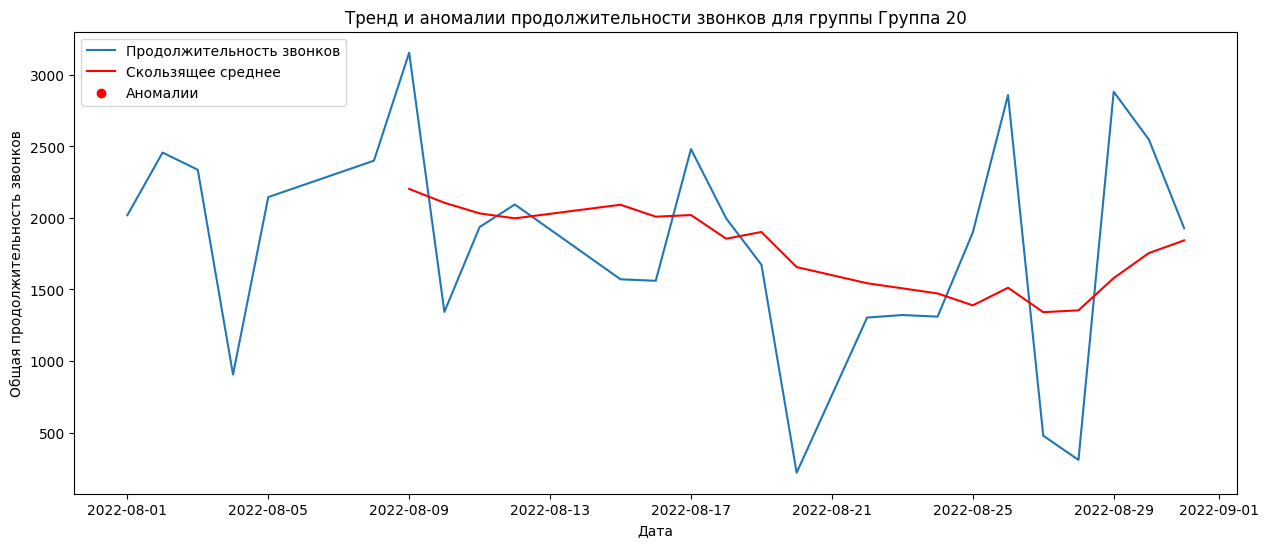

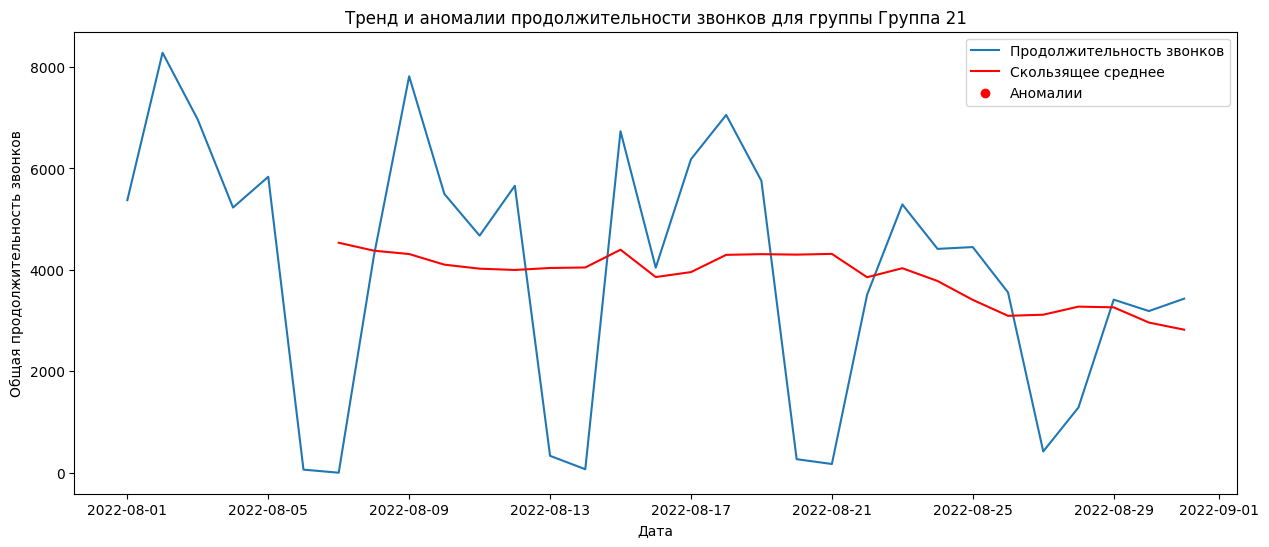

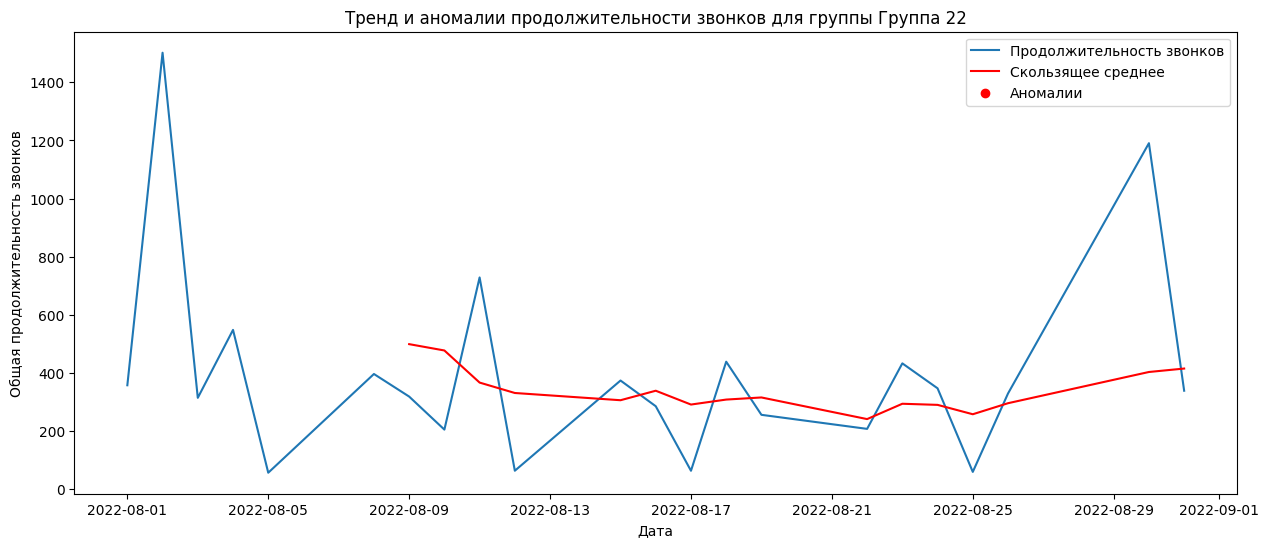

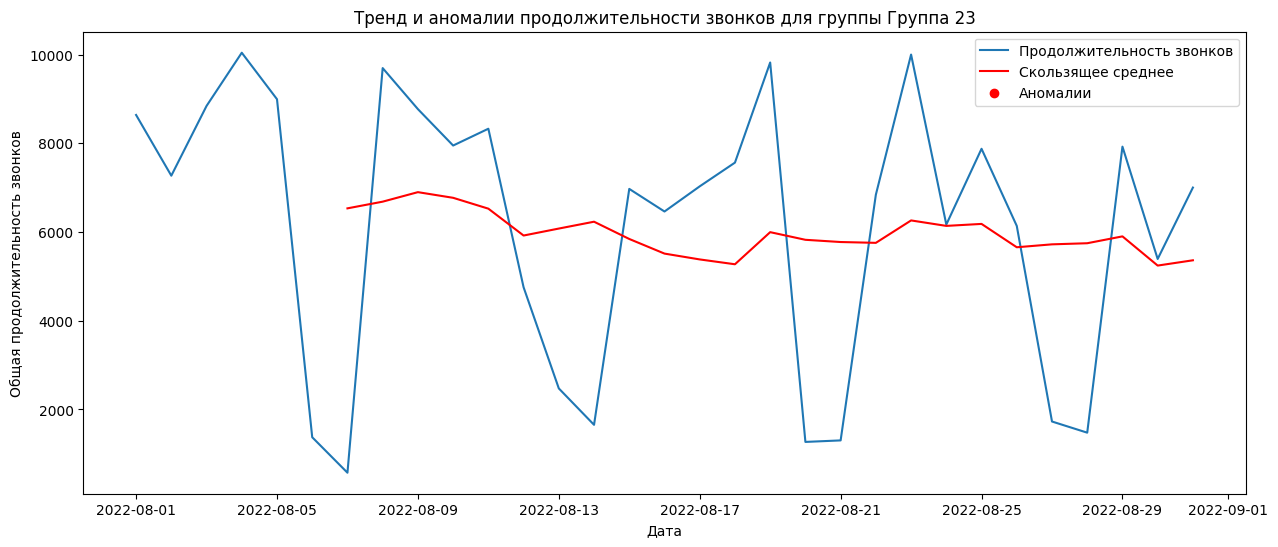

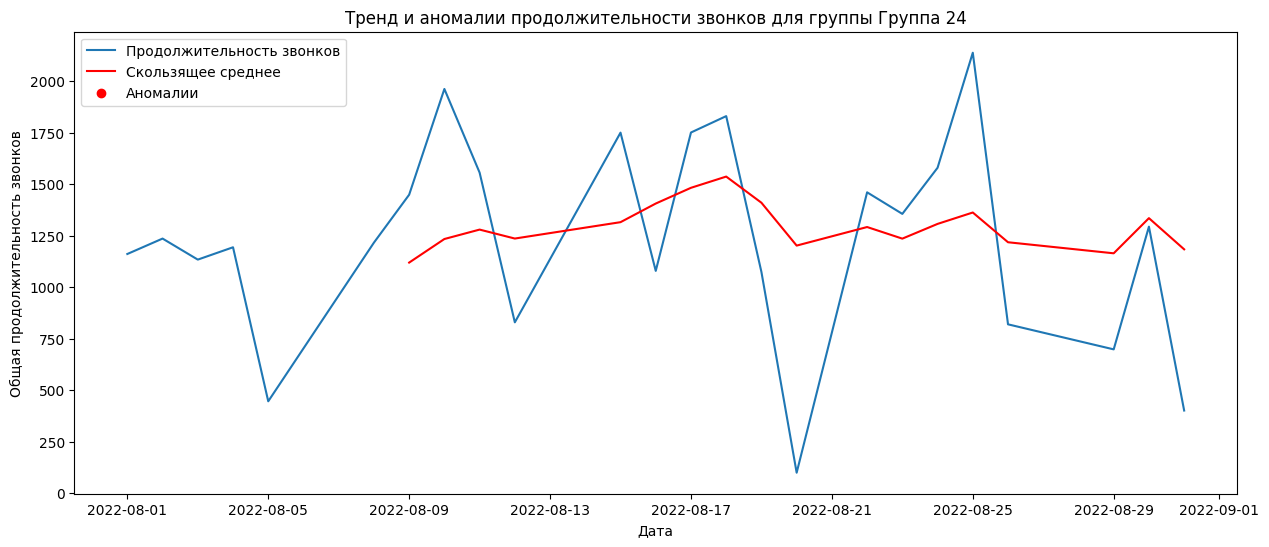

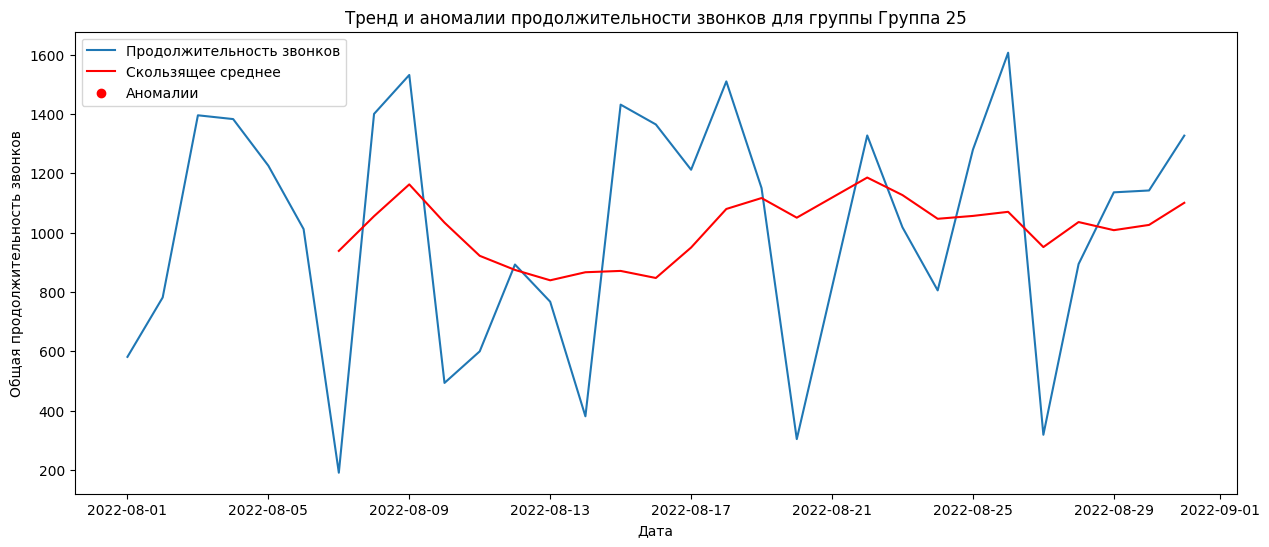

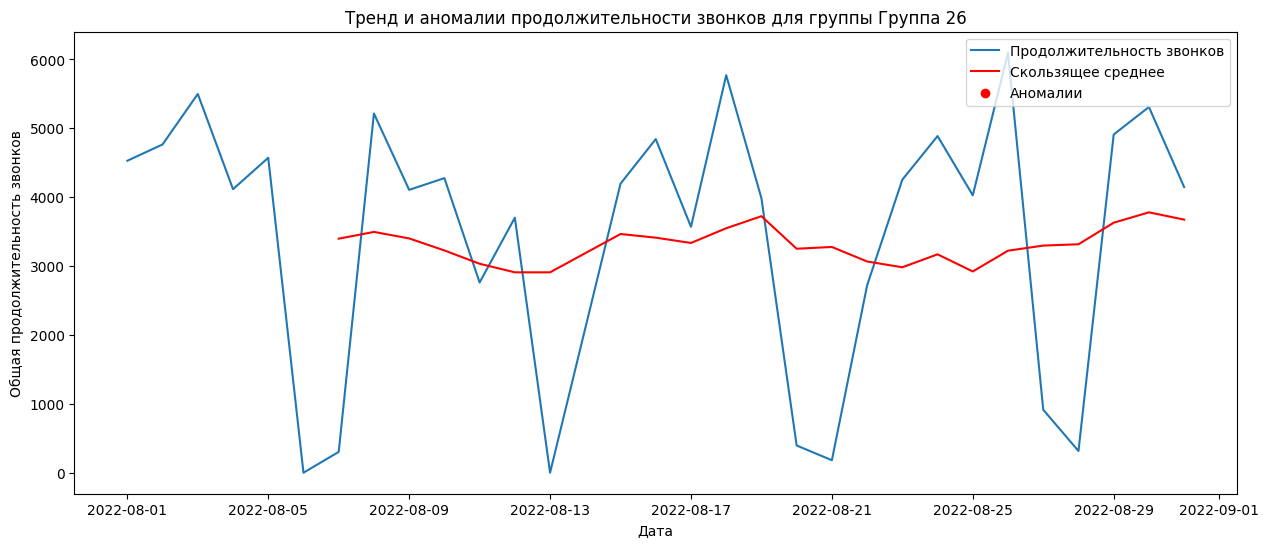

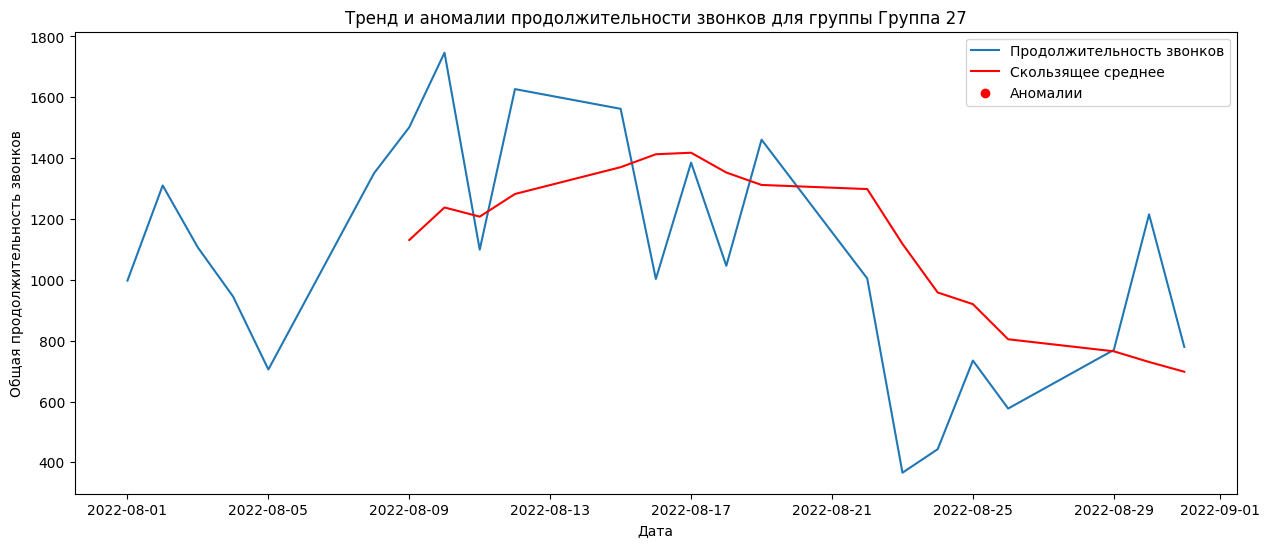

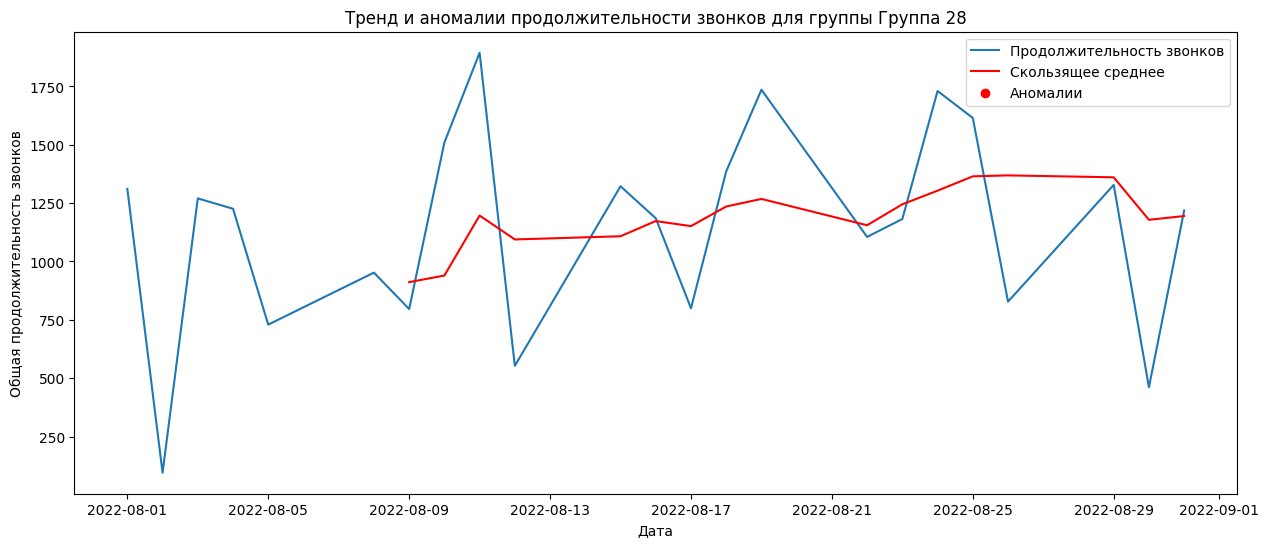

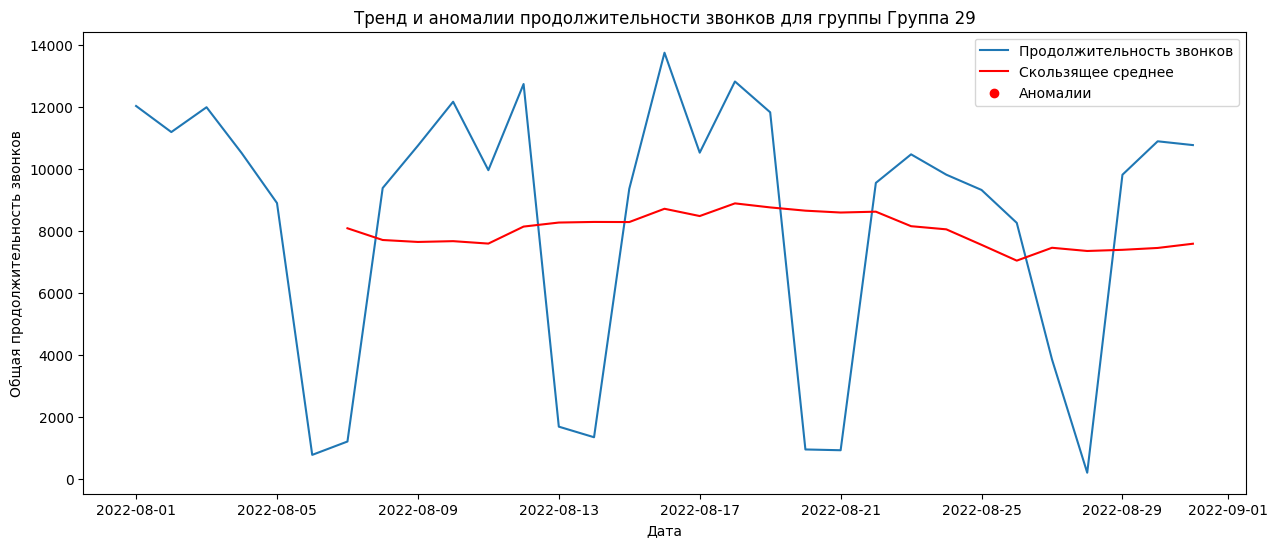

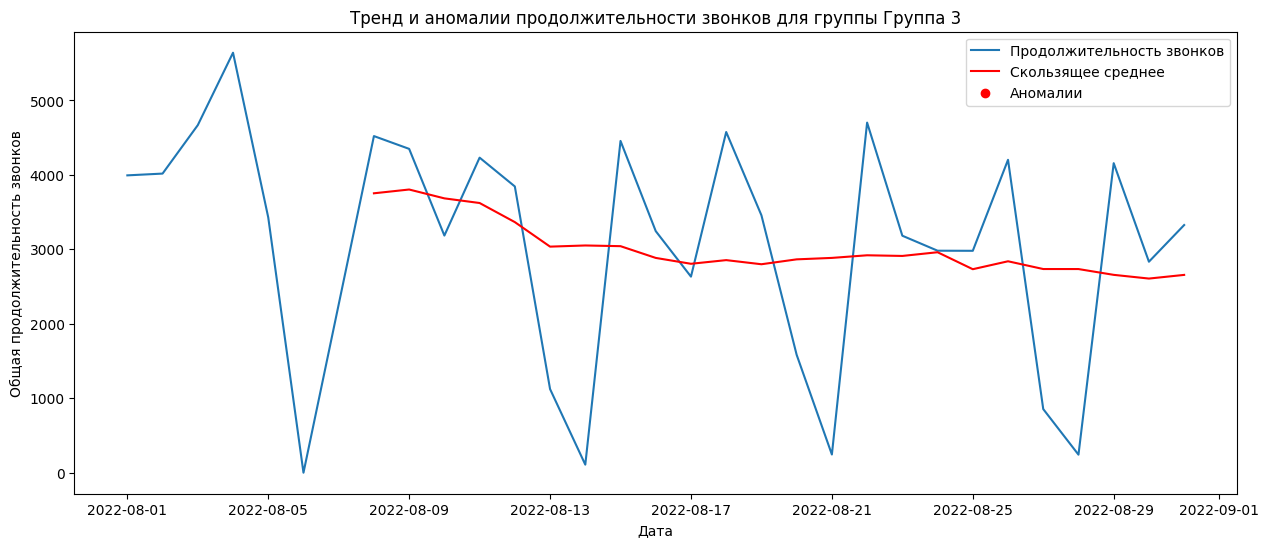

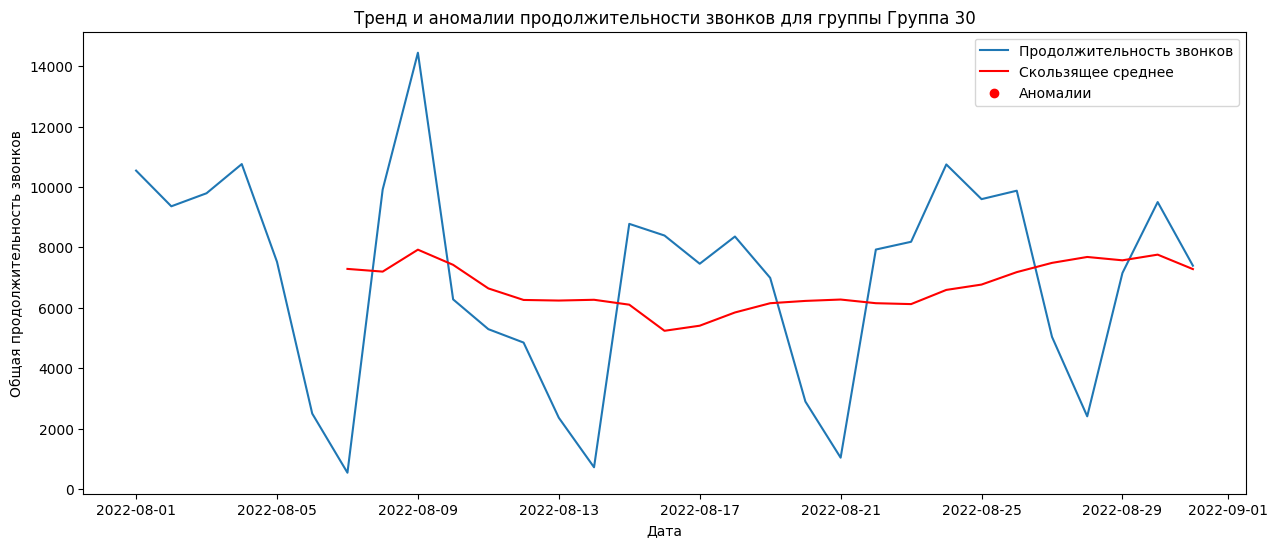

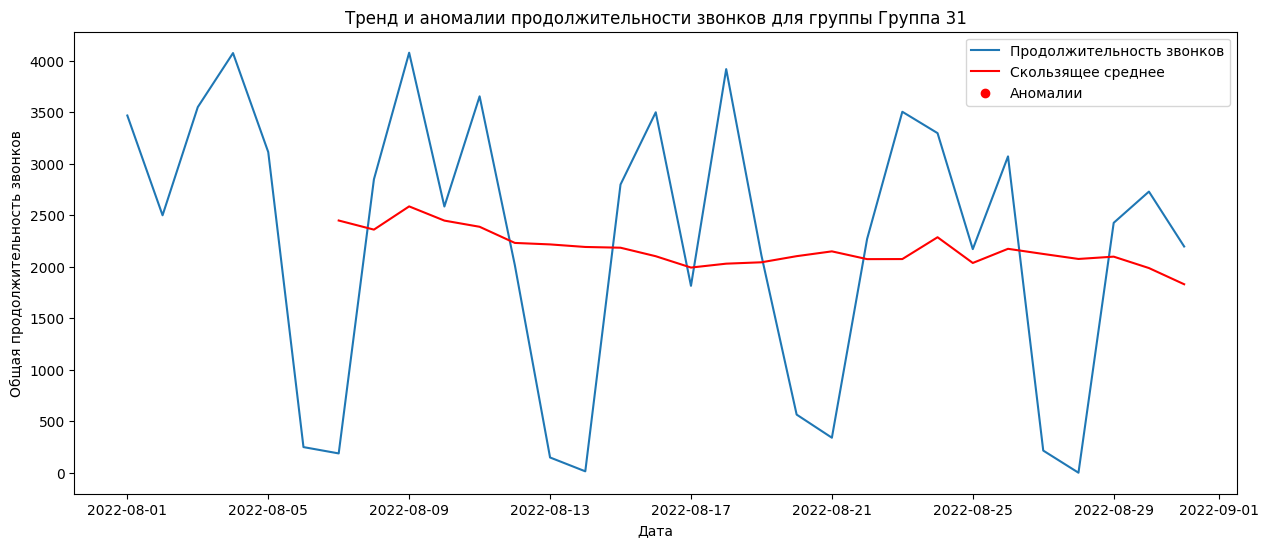

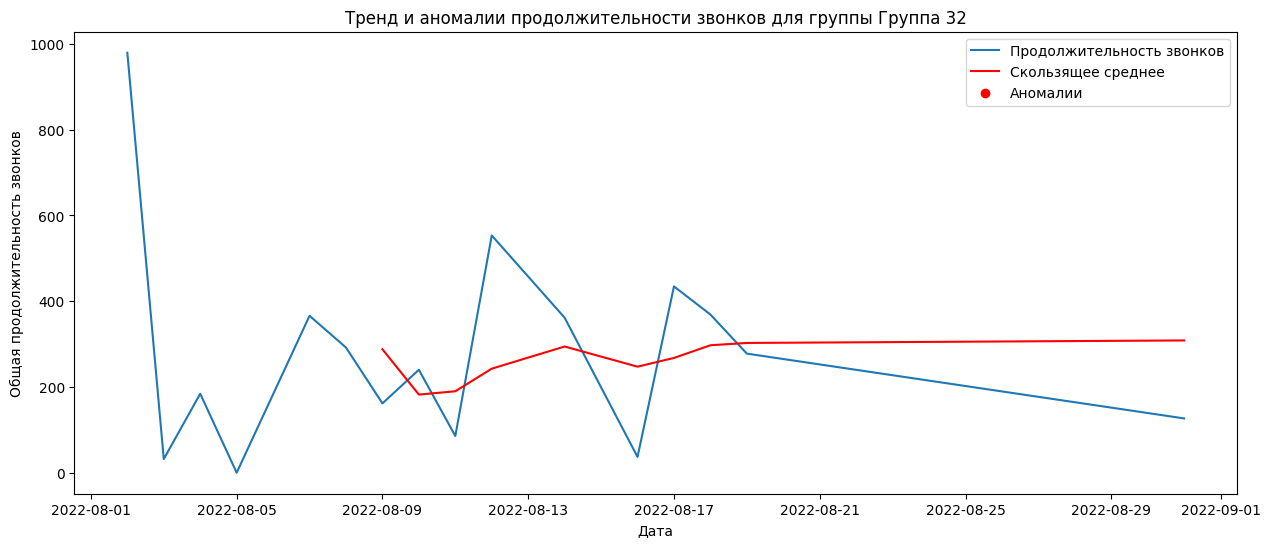

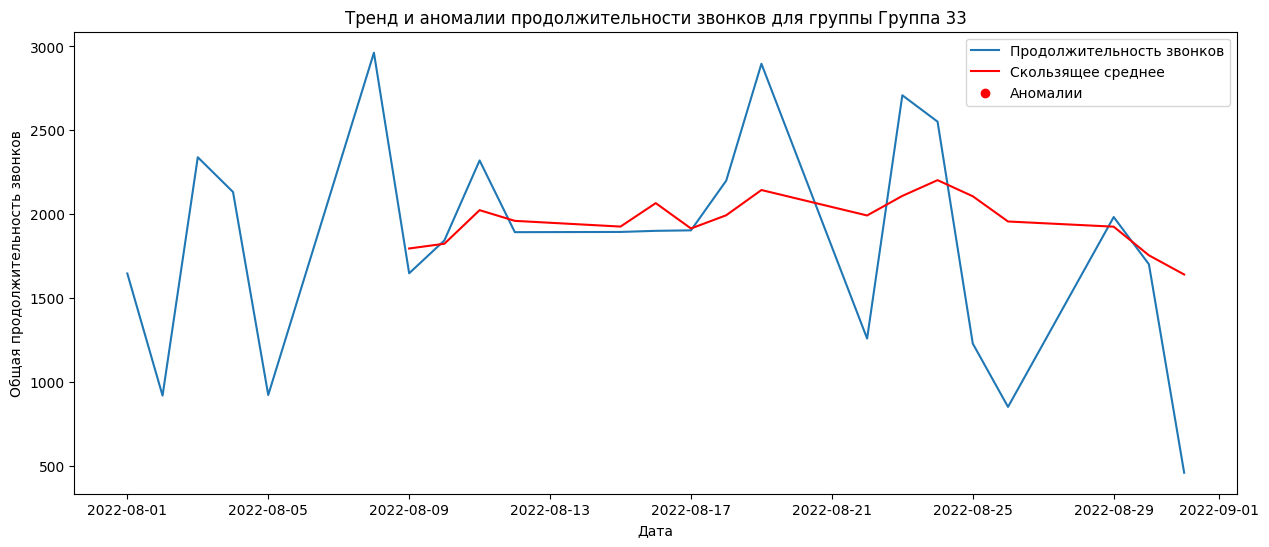

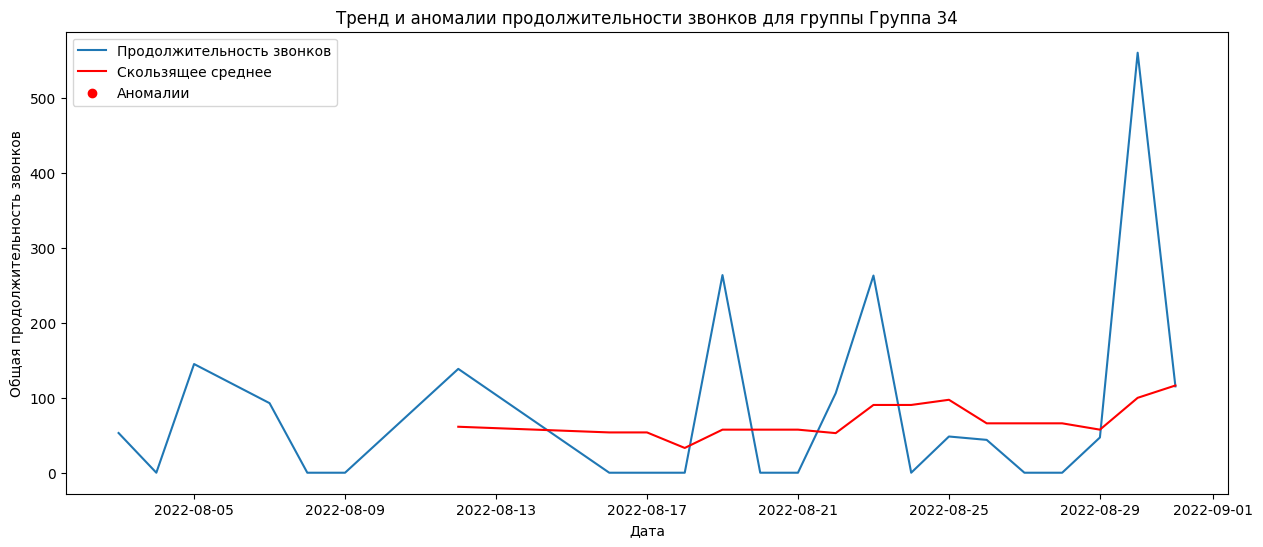

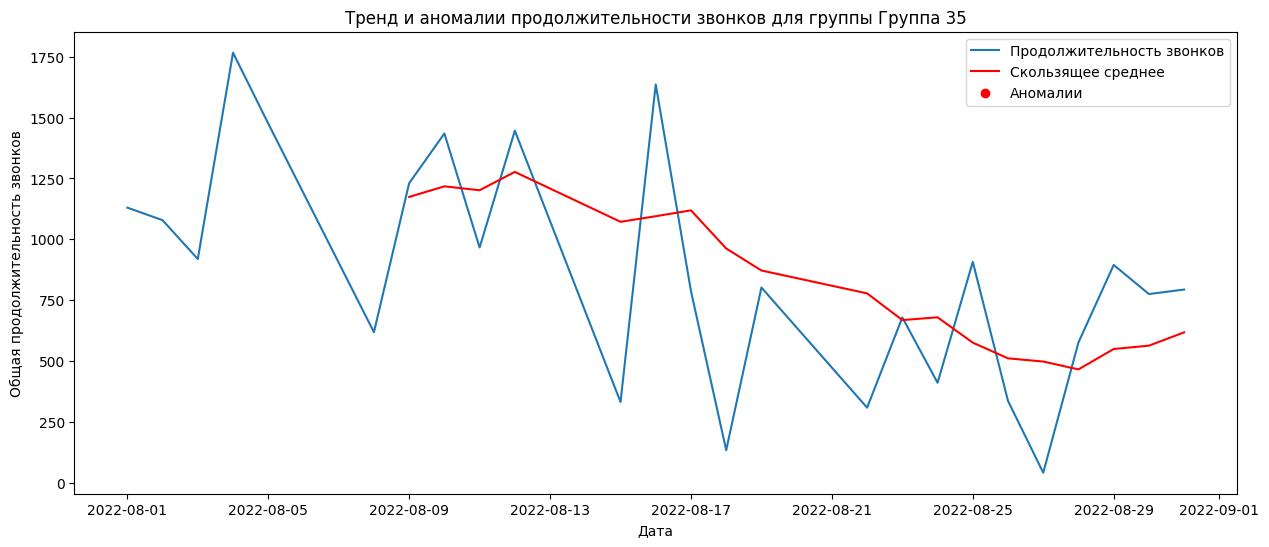

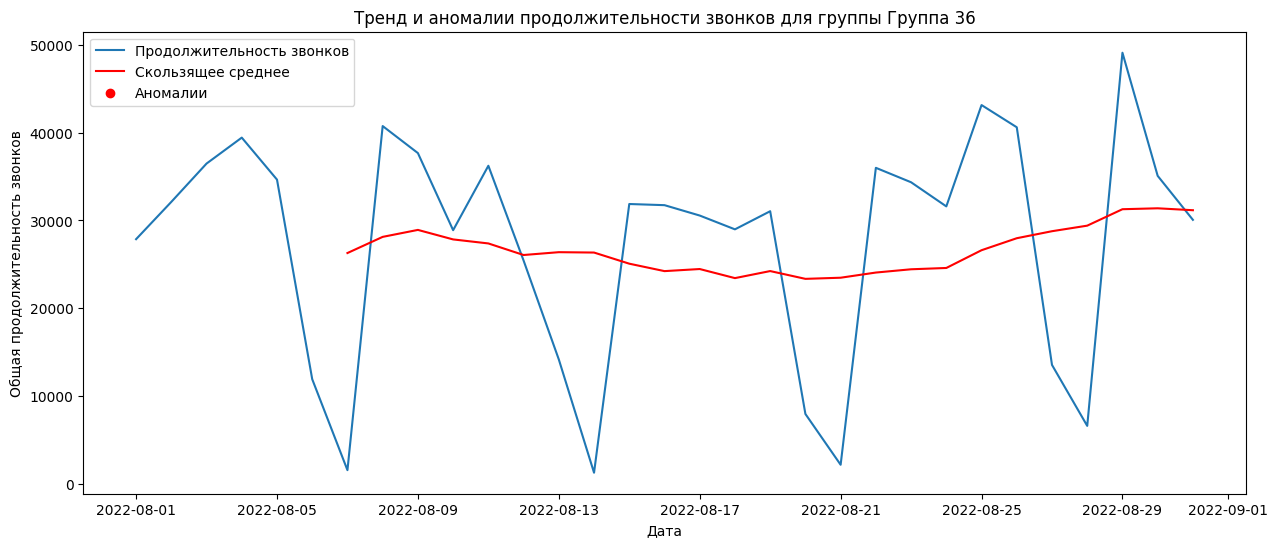

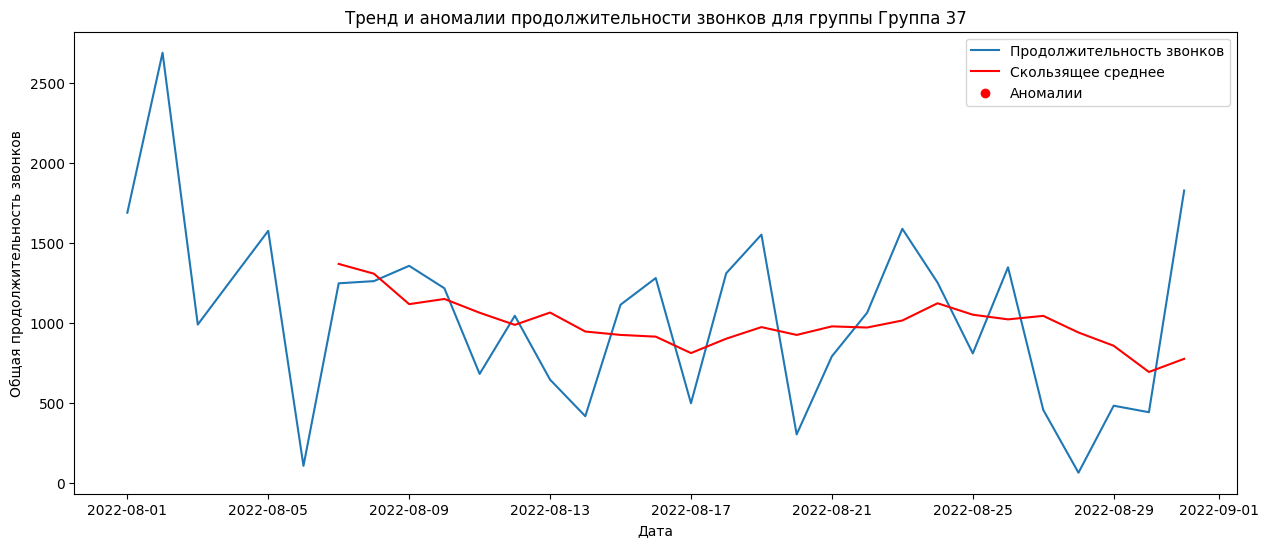

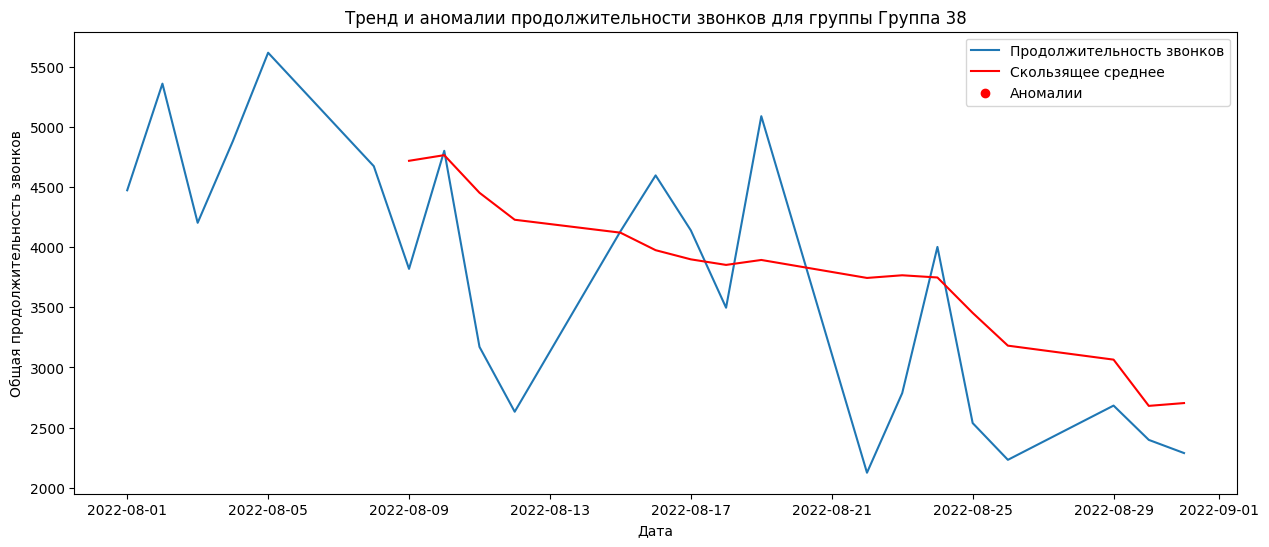

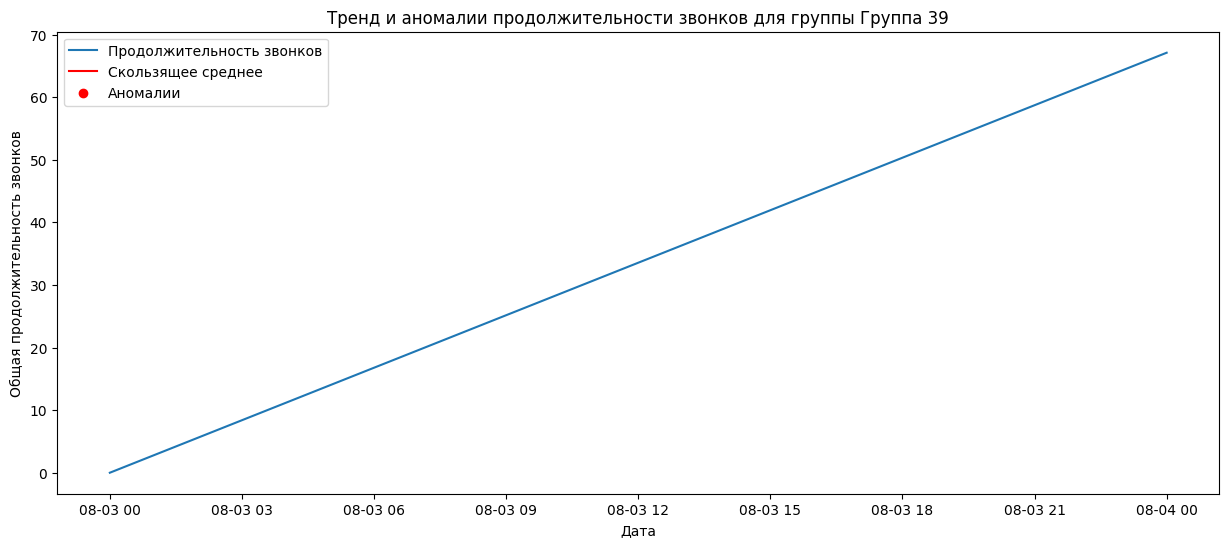

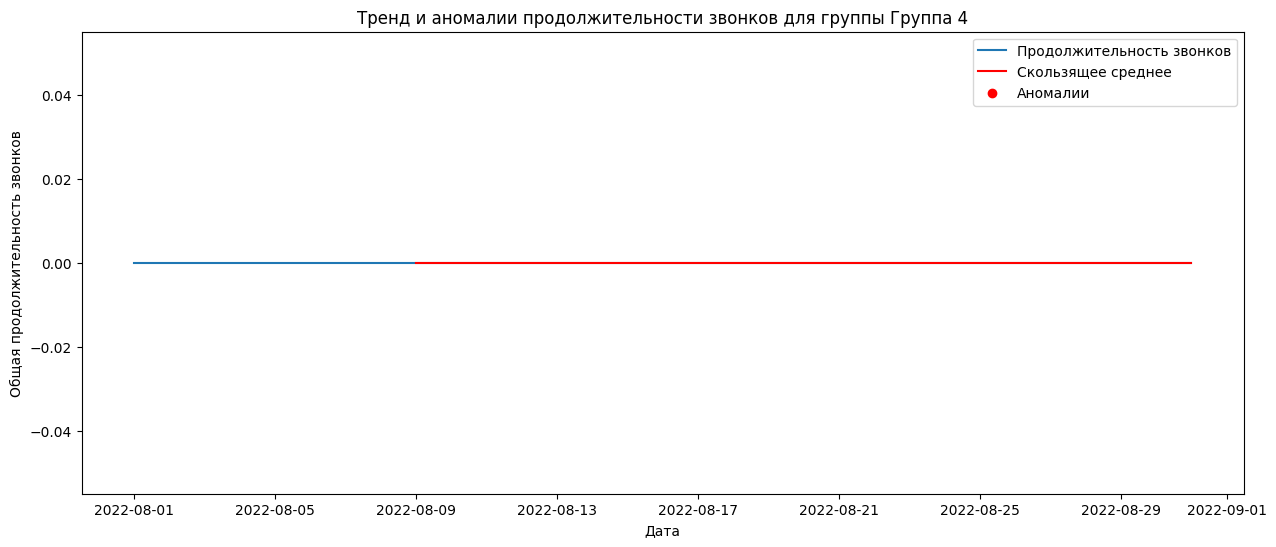

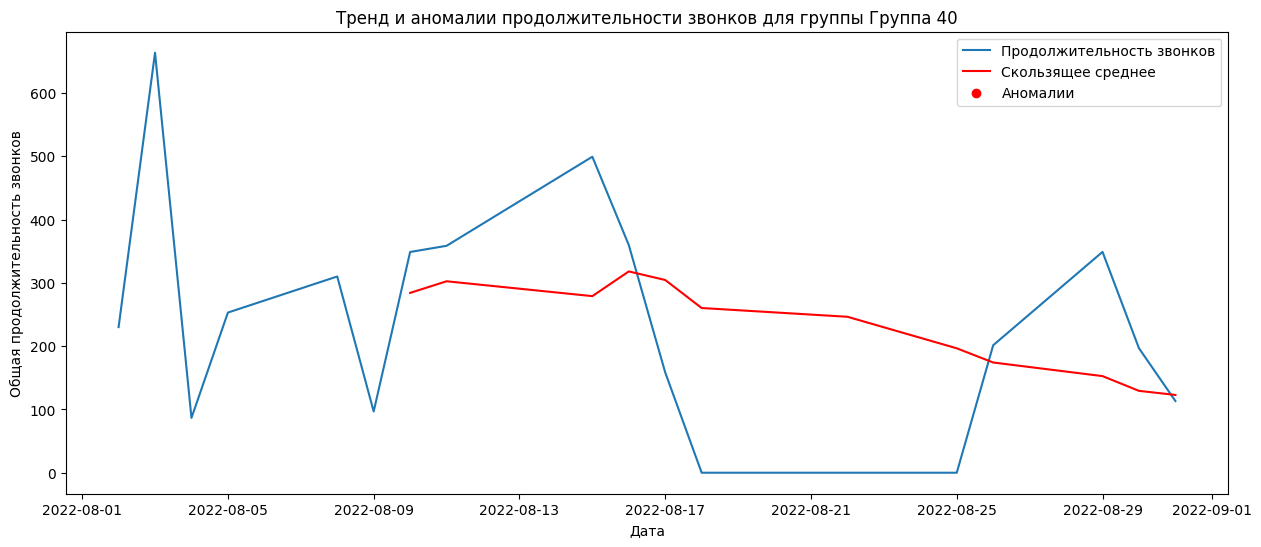

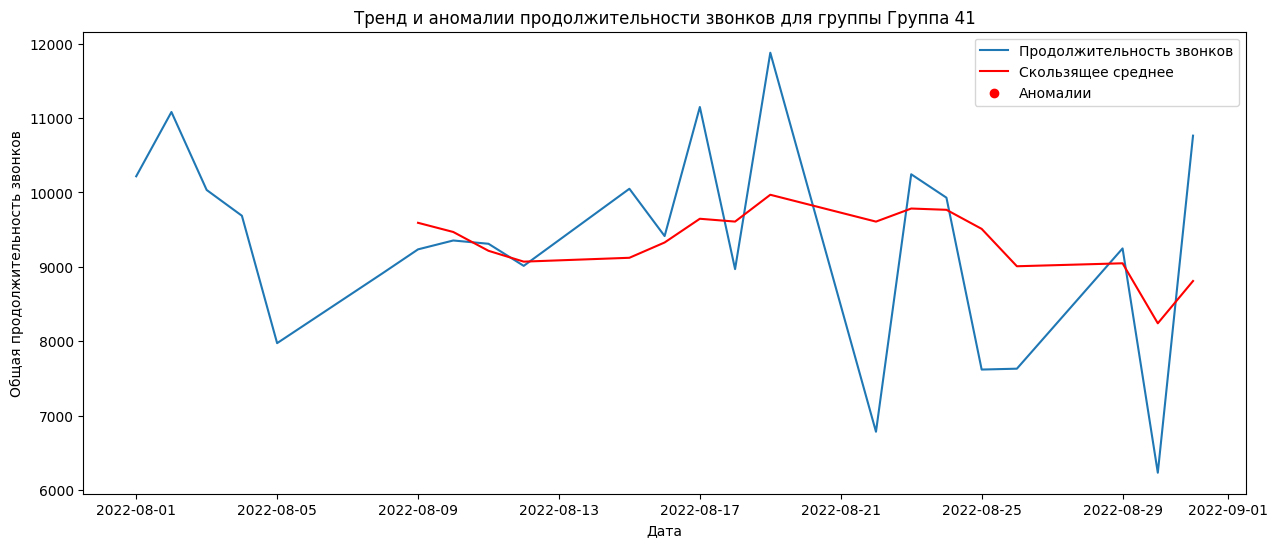

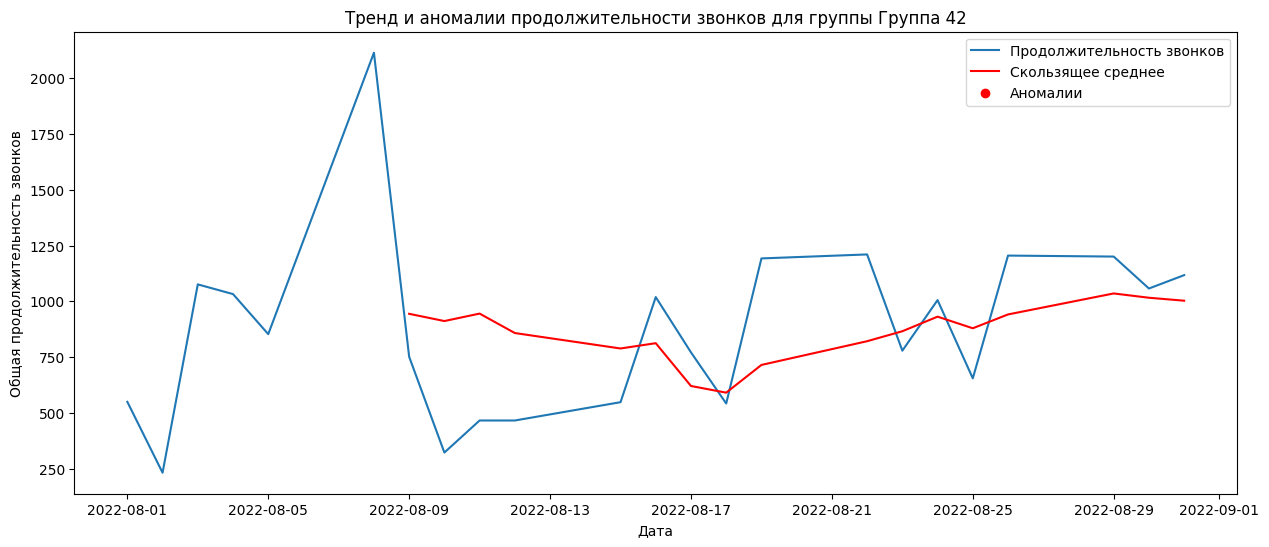

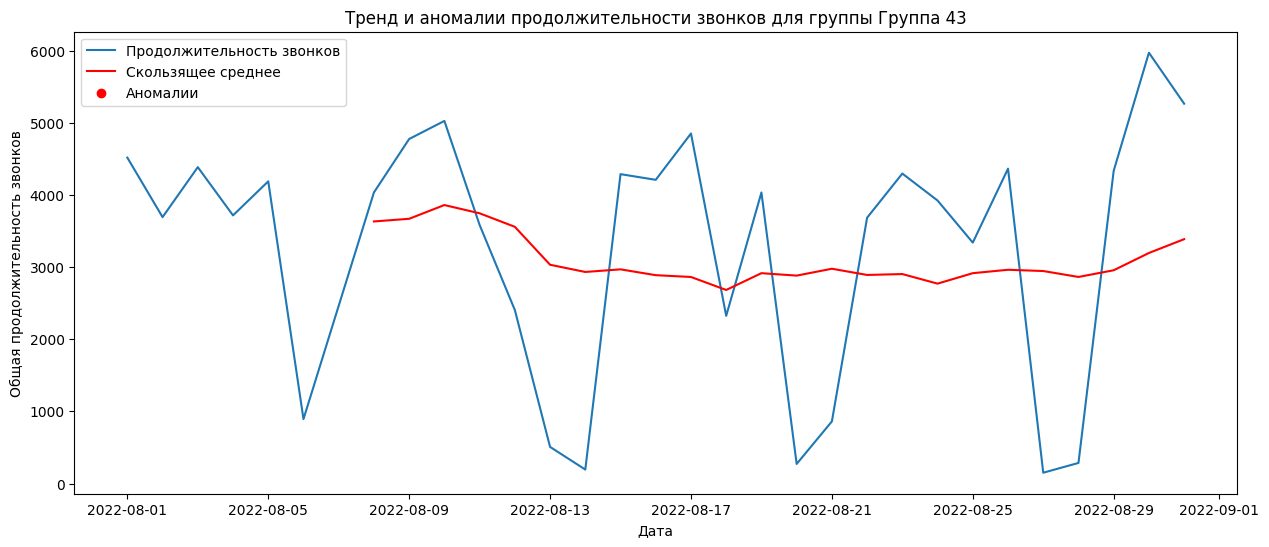

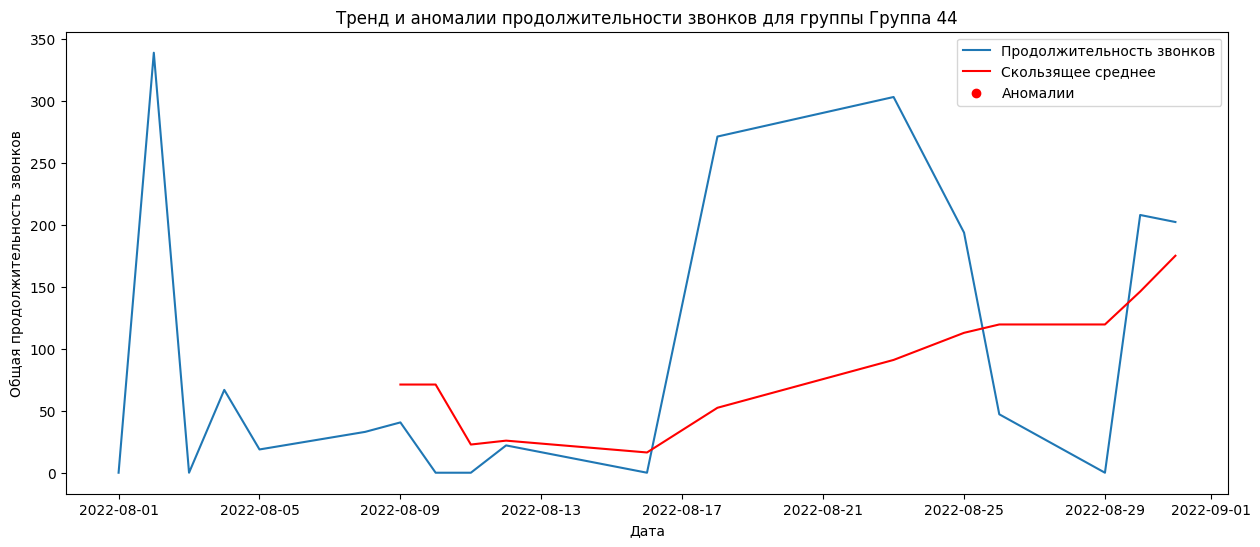

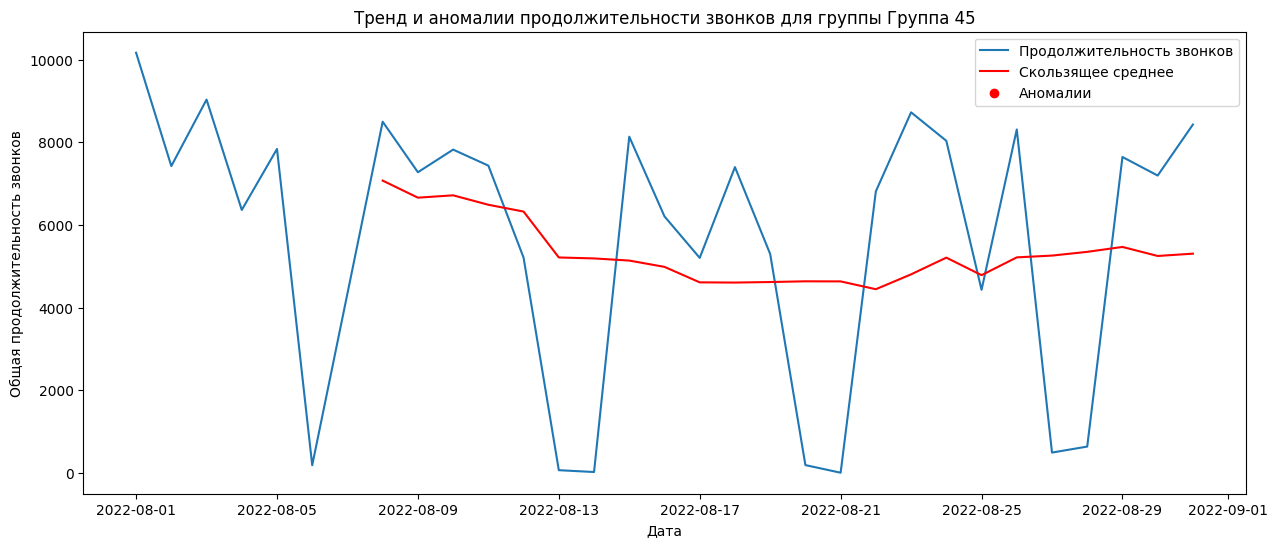

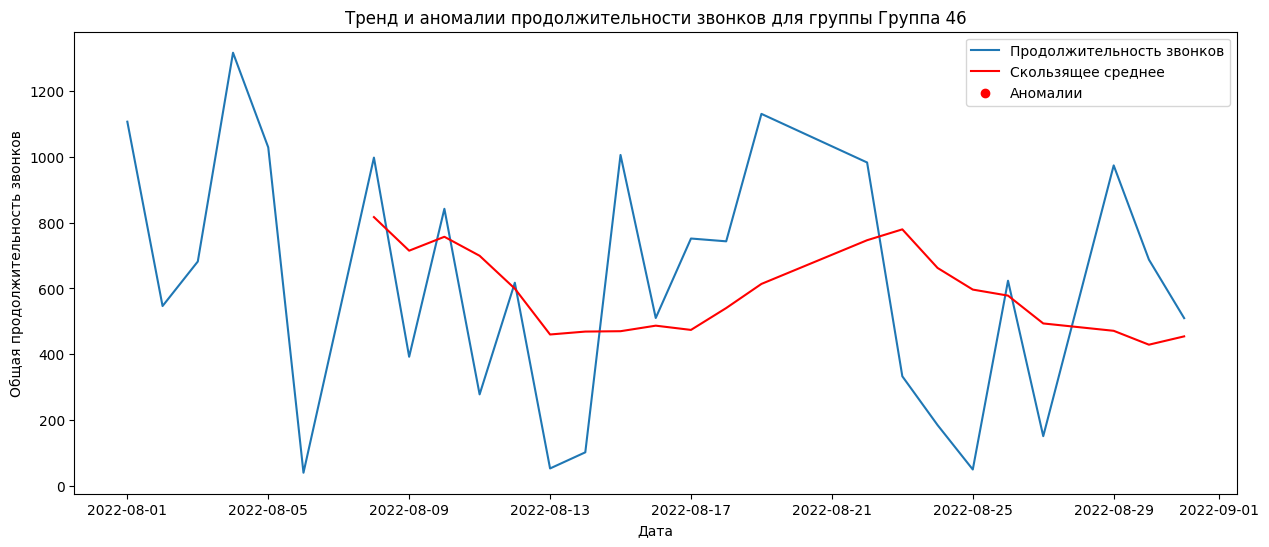

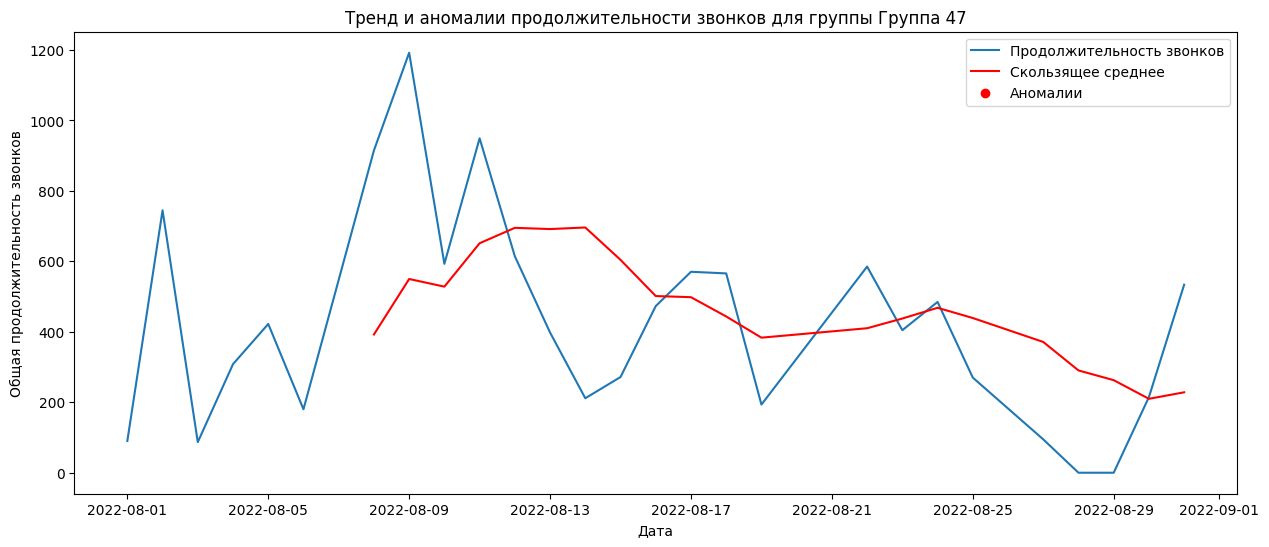

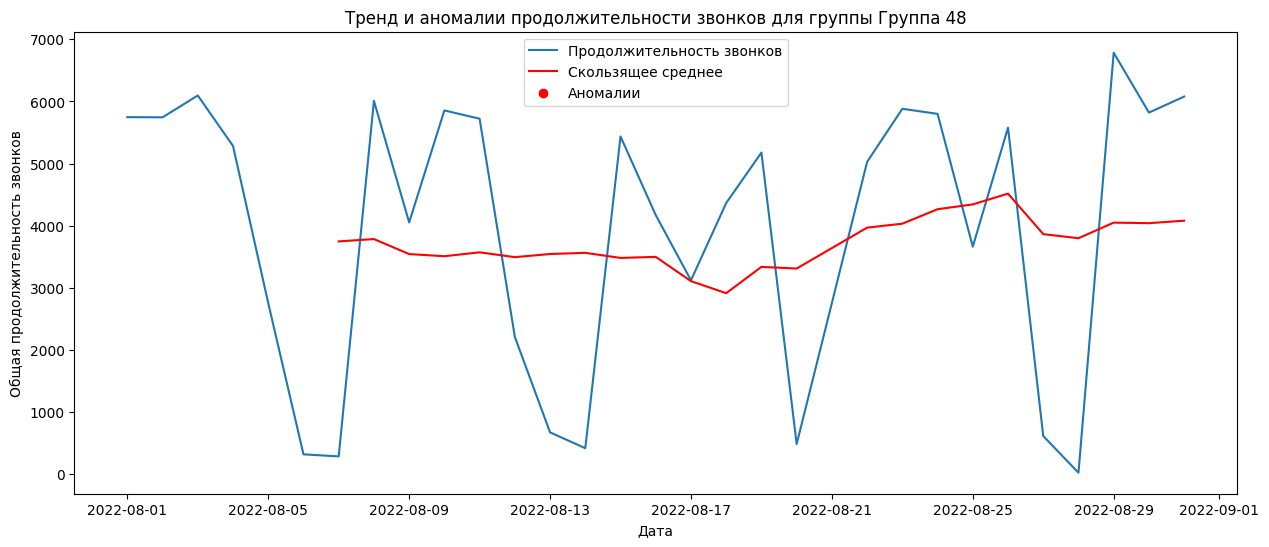

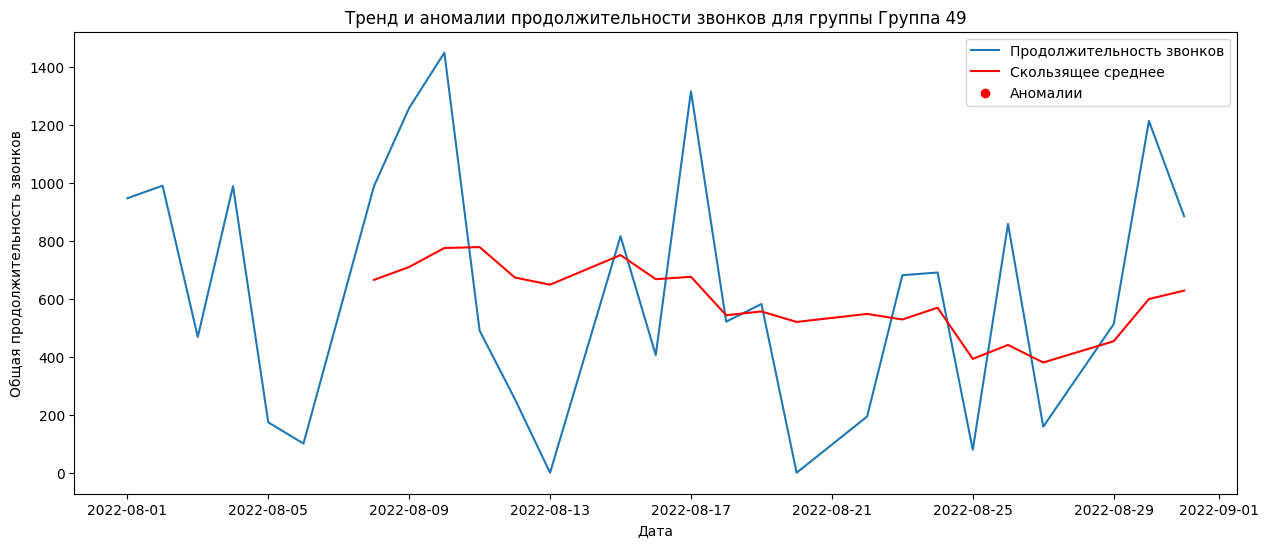

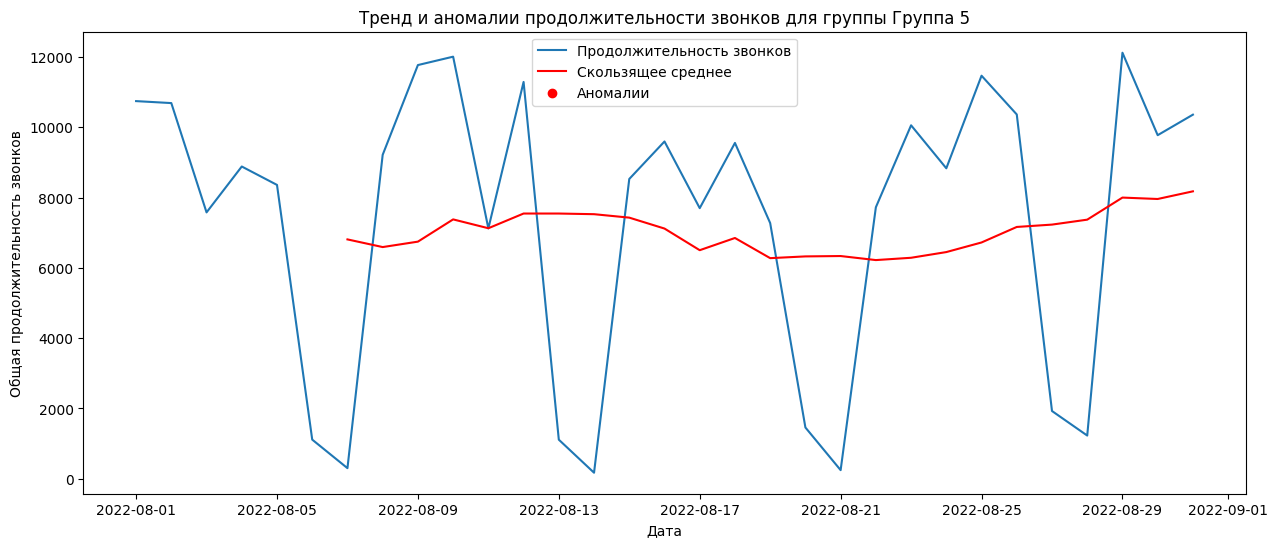

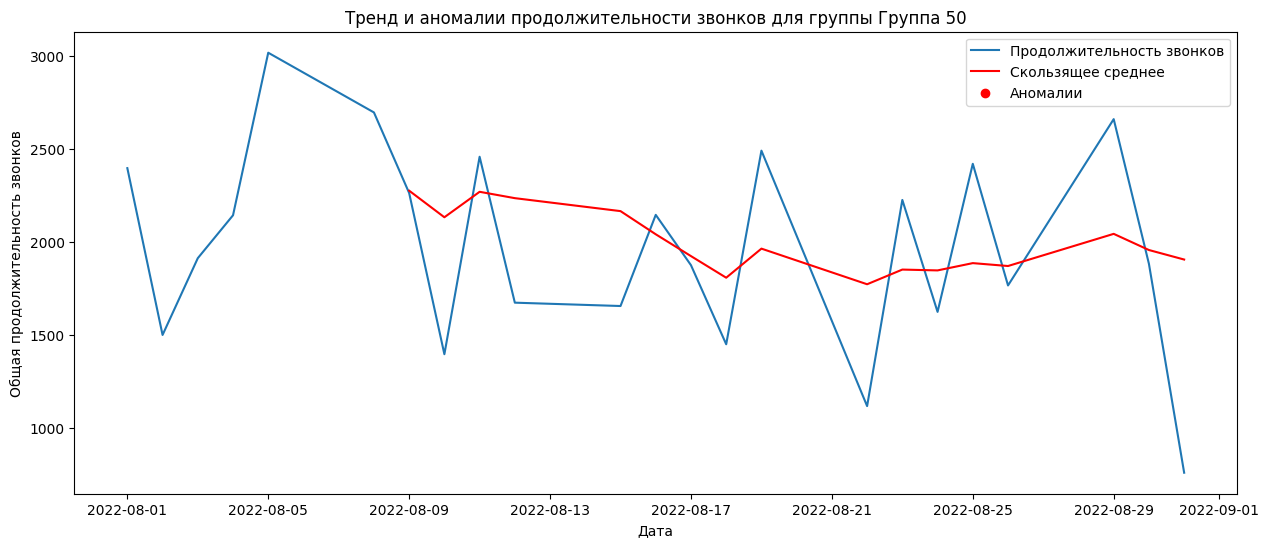

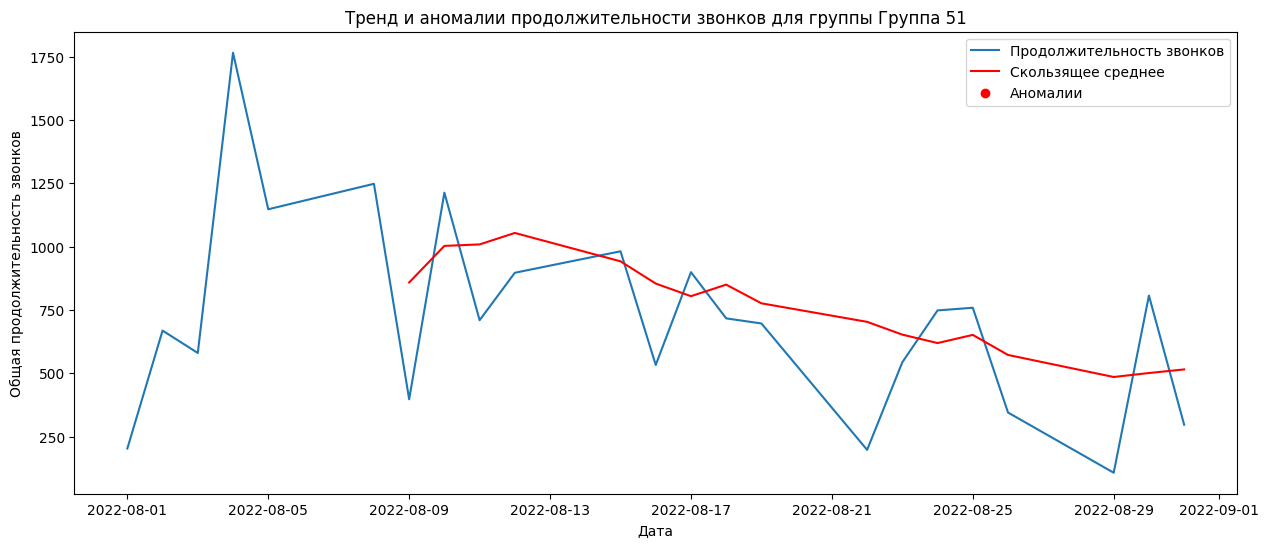

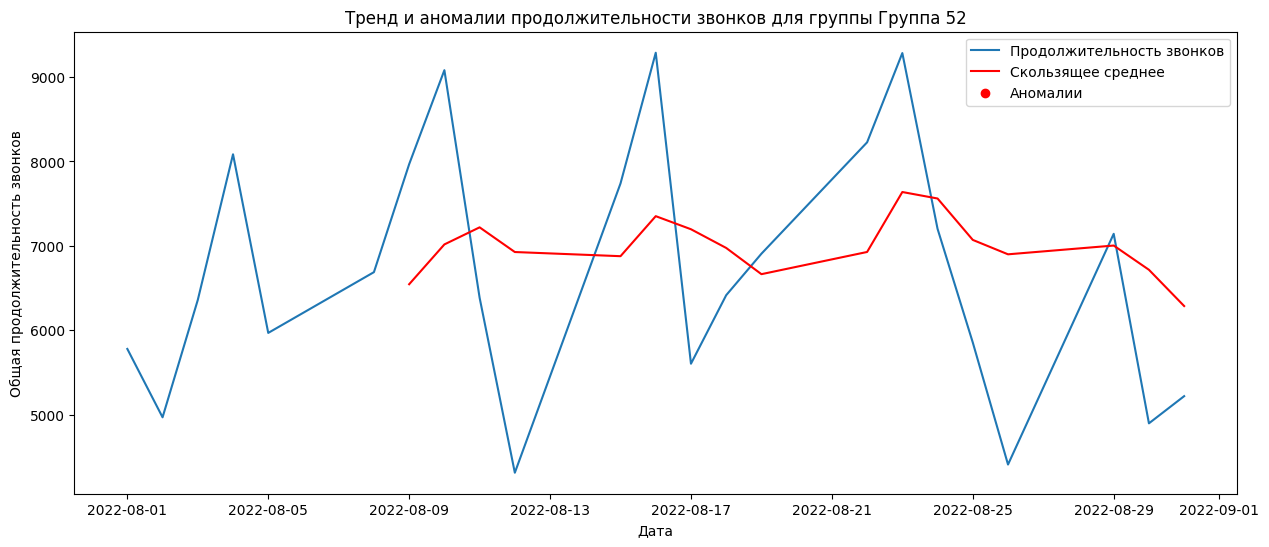

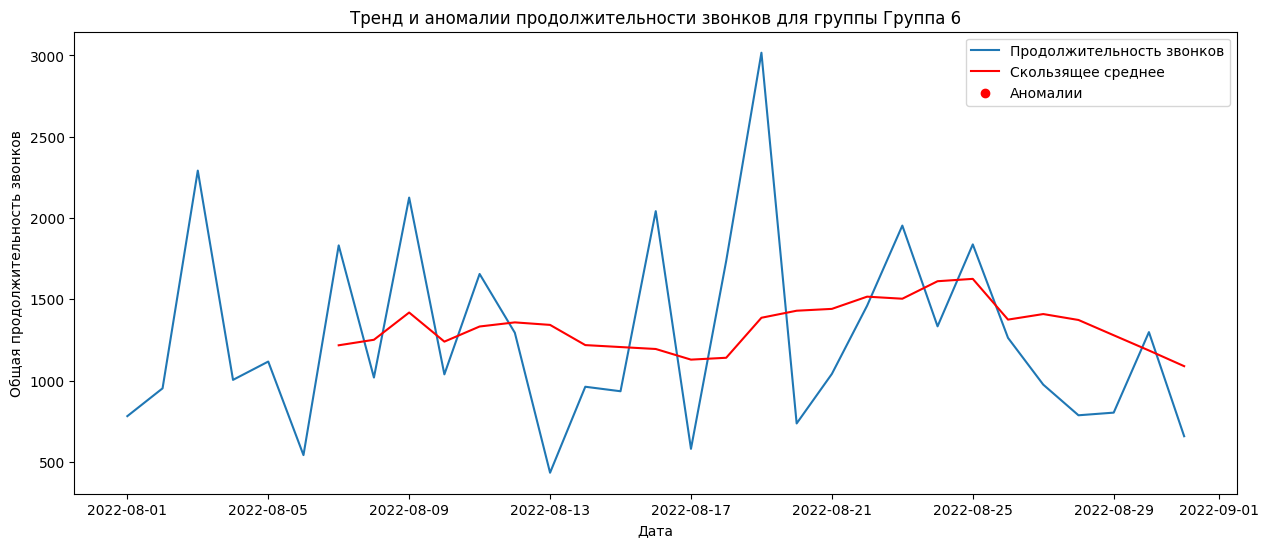

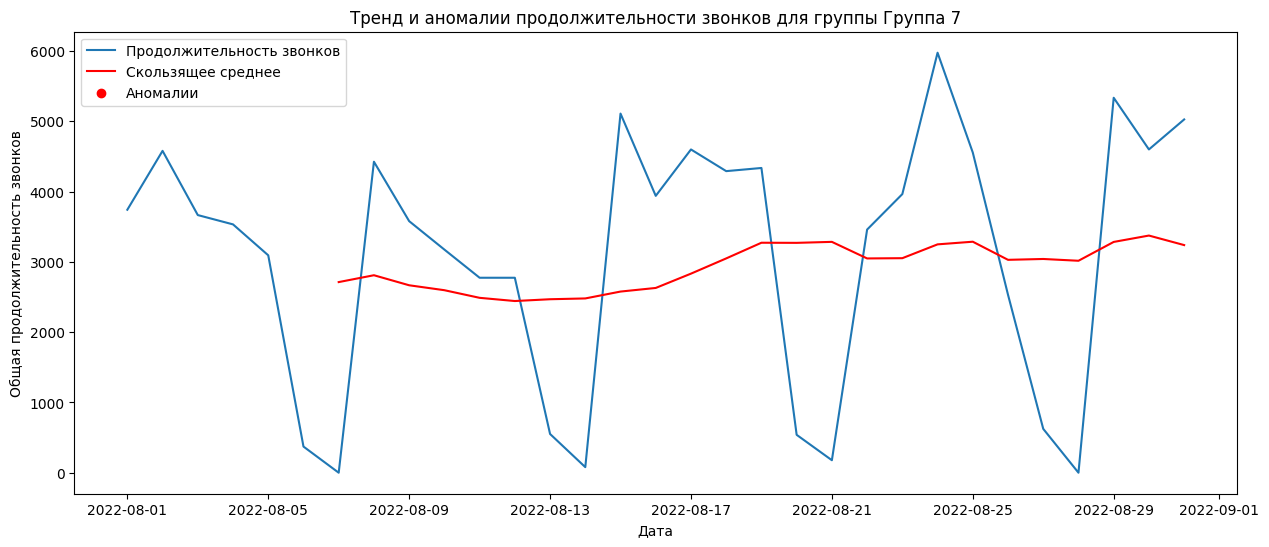

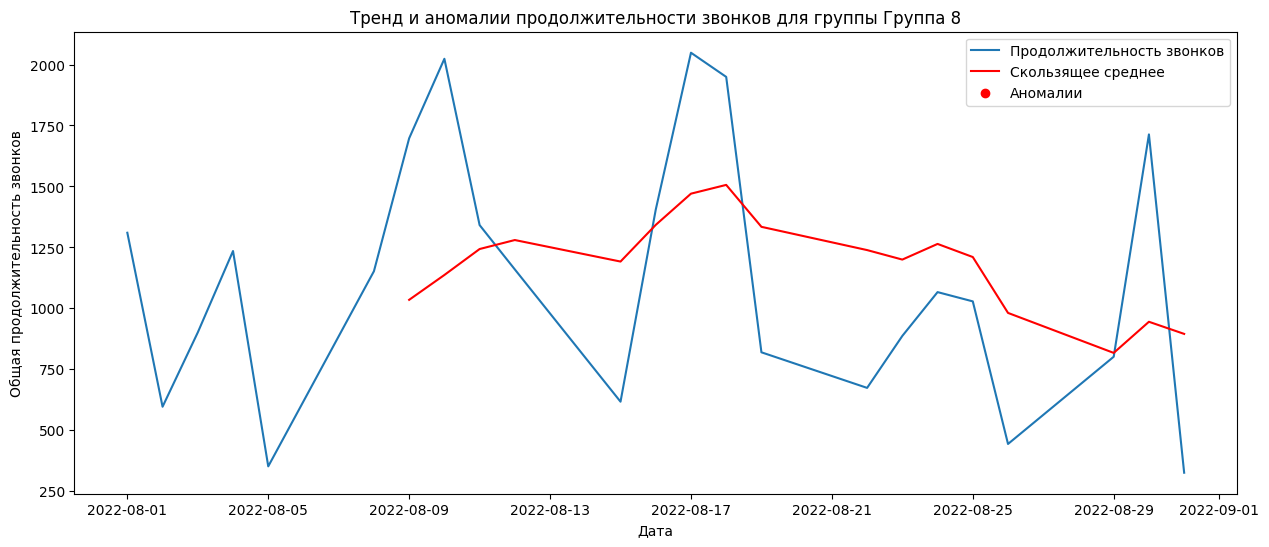

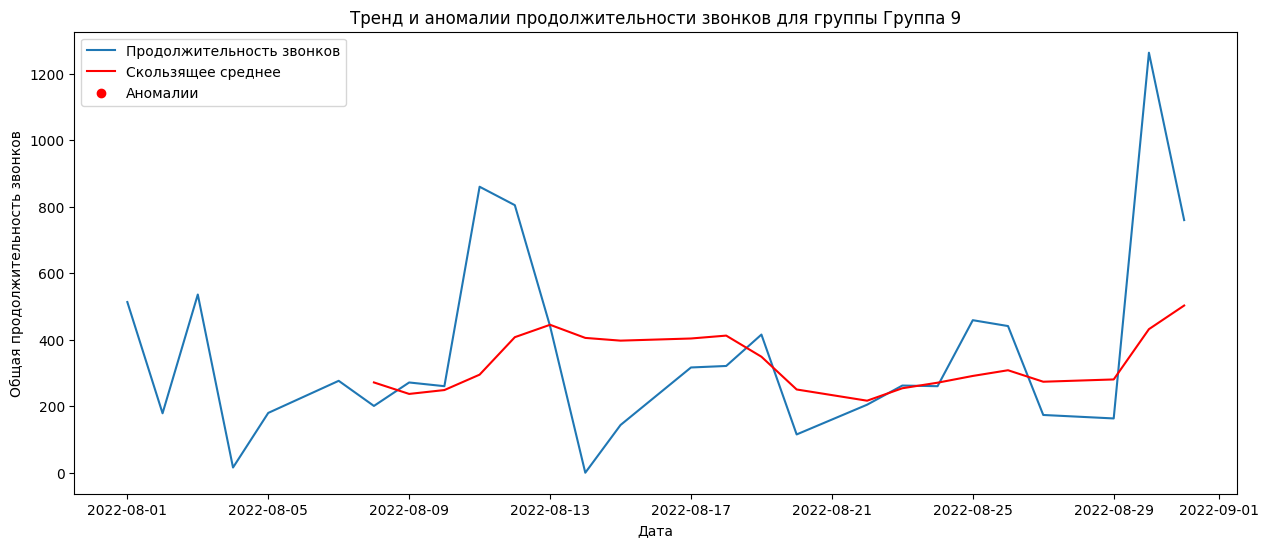

In [ ]:
data_for_trends = general[['finish_dttm', 'duratoin_sec', 'group_nm']]

data_for_trends['finish_dttm'] = pd.to_datetime(data_for_trends['finish_dttm']).dt.date

group_daily_calls = data_for_trends.groupby(['group_nm', 'finish_dttm']).agg({'duratoin_sec': 'sum'}).reset_index()

group_daily_calls['rolling_mean'] = group_daily_calls.groupby(['group_nm'])['duratoin_sec'].rolling(window=7).mean().reset_index(drop=True)

group_daily_calls['std_dev'] = group_daily_calls.groupby(['group_nm'])['duratoin_sec'].rolling(window=7).std().reset_index(drop=True)
group_daily_calls['anomaly'] = np.where((group_daily_calls['duratoin_sec'] > group_daily_calls['rolling_mean'] + 3 * group_daily_calls['std_dev']) | (group_daily_calls['duratoin_sec'] < group_daily_calls['rolling_mean'] - 3 * group_daily_calls['std_dev']), 1, 0)

unique_groups = group_daily_calls['group_nm'].unique()

for group in unique_groups:
    fig, ax = plt.subplots(figsize=(15, 6))
    group_data = group_daily_calls[group_daily_calls['group_nm'] == group]
    
    group_data.plot(x='finish_dttm', y='duratoin_sec', ax=ax, label='Продолжительность звонков')
    group_data.plot(x='finish_dttm', y='rolling_mean', ax=ax, color='red', label='Скользящее среднее')
    ax.scatter(group_data[group_data['anomaly'] == 1]['finish_dttm'], group_data[group_data['anomaly'] == 1]['duratoin_sec'], color='red', label='Аномалии')

    ax.set_ylabel('Общая продолжительность звонков')
    ax.set_xlabel('Дата')
    ax.legend()

    plt.title(f'Тренд и аномалии продолжительности звонков для группы {group}')
    plt.show()


Этот код будет строить графики трендов и аномалий для каждой группы. Для групп 12, 16, 17, 19, 21, 27, 33, 35, 37, 40, 47, 50, 51, 52, 8 наблюдается снижение продолжительности звонков. А мы выявили что продолжительность звонков влиет на их успешность






### Вывод

1. Для групп 12, 16, 17, 19, 21, 27, 33, 35, 37, 40, 47, 50, 51, 52, 8 наблюдается снижение продолжительности звонков. А мы выявили что продолжительность звонков влиет на их успешность

## Конверсия

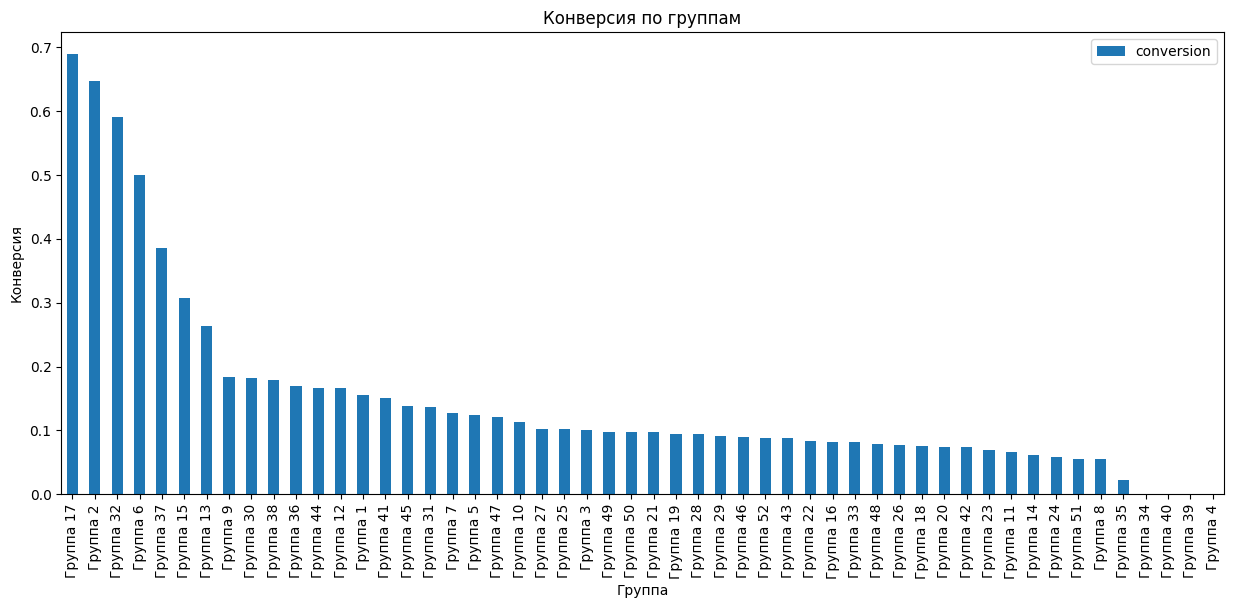

In [ ]:
# Выберите данные для анализа трендов
data_for_conversion = general[['group_nm', 'hit_status_result_desc']]

# Рассчитайте количество успешных и отказных звонков по группам
calls_by_group = data_for_conversion.groupby(['group_nm', 'hit_status_result_desc']).size().unstack().reset_index().fillna(0)

# Рассчитайте конверсию для каждой группы
calls_by_group['conversion'] = calls_by_group['Дозвон, Успешно'] / (calls_by_group['Дозвон, Успешно'] + calls_by_group['Дозвон, Отказ'])
calls_by_group.sort_values('conversion', ascending=False, inplace=True)

# Постройте график конверсии для каждой группы
fig, ax = plt.subplots(figsize=(15, 6))

calls_by_group.plot(x='group_nm', y='conversion', kind='bar', ax=ax)

ax.set_ylabel('Конверсия')
ax.set_xlabel('Группа')
ax.set_title('Конверсия по группам')

plt.xticks(rotation=90)
plt.show()


### Вывод

1. Самая большая коневенсия у 17, 2, 32, 6, 37 группы. Нулевая уонвенсия у групп 34, 40, 39, 4







## Общий вывод по заданию 3

Итог: 
1. Проверить почему отсутствует запись об идентификторе очереди, на которую получено задание.  
2. Проверить звонки оператора '0212legr'. 
3. Уточнит почему долго обрабатыват задания операторы 'covaadru', 'rovaeagu', 'movafaab', '6406akko', 'enkovaab', '6886aiaz'
4. Эффективней всего работают группы:
17, 32, 6, 37. Для группы 17 наблюдается уменьшение продолжительности звонков, возможно, они просто опытней стали. 
5. 43 оператора не сделали даже часа проолжительноси звонков за август, возможно, в отпуске.
6. Для групп 12, 16, 19, 21, 27, 33, 35, 37, 40, 47, 50, 51, 52, 8 наблюдается снижение продолжительности звонков. А мы выявили что продолжительность звонков влиет на их успешность
